<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/OnlineRetailCustomerSegmentation/blob/main/Online_Retail_Customer_SegmentationCapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Mrutyunjaya Sahoo

# **Project Summary -**

First We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some data analysis and visualize between different variables and tried to draw observations from the features we had in the dataset.

we saw how we can segment our customer depending on our business requirements. We perform RFM for our entire customer base.

RFM analysis can help in answering many questions with respect to the customers and this can help companies to make marketing strategies for their clients and their slipping customers and providing recommendations to their customer based on their interest.

Using cluster profiling the average of recency, frequency and monetary values for each customer segment was identified.We used the K-means algorithm to segment our customer in various clusters having similar similarity.Also we remember that the more the number of cluster we take the better the result we get (seperation of multiple cluster).

# **GitHub Link -**

https://github.com/sahoomrutyunjaya12345/OnlineRetailCustomerSegmentation.git

# **Problem Statement**


**In this project, my task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

## <b> Data Description </b>

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import missingno as msno
from datetime import datetime
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing our .csv data files by using unicode_escape for unicode format of our dataset if any
customer_data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/unsupervised learning capstone/Online Retail.xlsx - Online Retail.csv',encoding= 'unicode_escape')

In [5]:
# checking the first 5 dataset
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [6]:
# checking the last 5 dataset
customer_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [7]:
# checking the size of the dataset
customer_data.shape

(541909, 8)

Our customer_data has 541909 rows and 8 columns

In [8]:
# checking the dataset columns
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
# checking the datatypes of our dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
# Checking the null values if any
customer_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

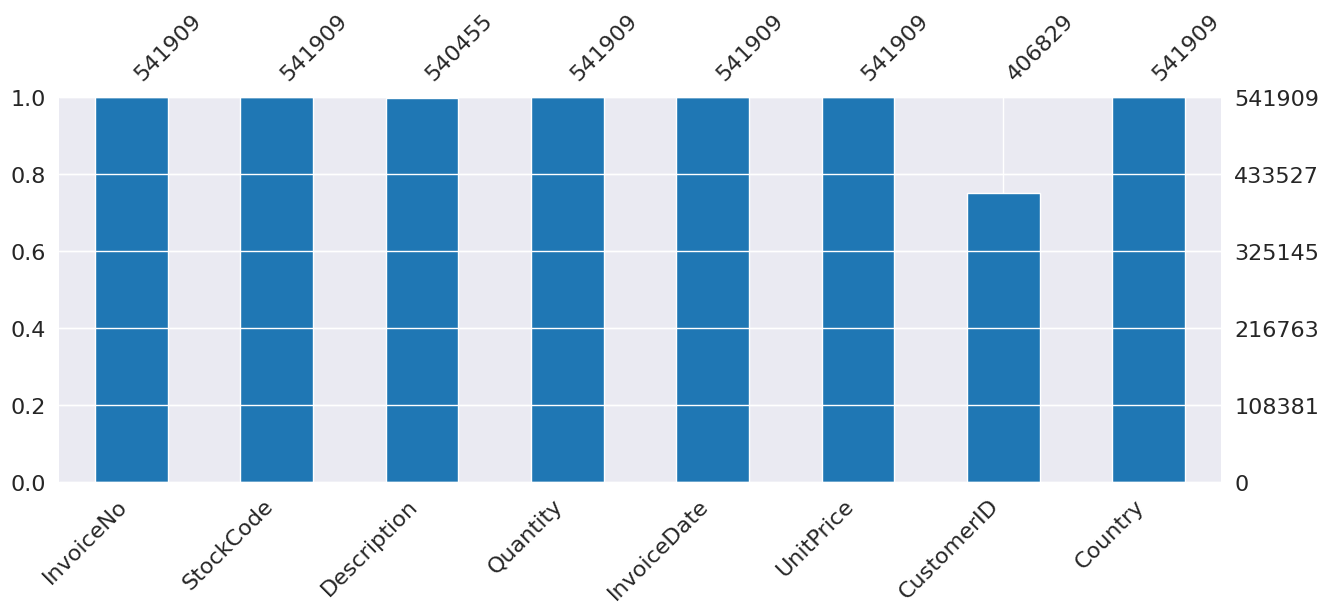

In [11]:
# visualizing the null values through missingo library
msno.bar(customer_data,figsize=(15,5),color="tab:blue")

So in our customer_data has two columns which has null values i.e. Description and CustomerID

In [12]:
# dropping those values with dropna()
customer_data.dropna(inplace=True)

In [13]:
# after removing checking the null values if any
customer_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
# After removing the null values checking for rows and columns
customer_data.shape

(406829, 8)

After removing the null values we have 406829 rows and 8 columns

In [15]:
# Checking the how many unique values of our dataset have
customer_data.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [16]:
# Checking the total number of duplicate values of our dataset have
print('Duplicate values in our dataset is :', len(customer_data[customer_data.duplicated()]))

Duplicate values in our dataset is : 5225


In [17]:
# Dropping the duplicate values in our dataset
customer_data.drop_duplicates(inplace=True)

In [18]:
# checking our dataset after dropping the duplicate values
customer_data.shape

(401604, 8)

So after dropping the dupicate values we have 401604 rows and 8 columns

In [19]:
# We have to drop the values of Invoice no which contains 'c',because it means cancelletion
customer_data = customer_data[~customer_data['InvoiceNo'].str.startswith('C')]
customer_data['InvoiceNo'].head(20)

0     536365
1     536365
2     536365
3     536365
4     536365
5     536365
6     536365
7     536366
8     536366
9     536367
10    536367
11    536367
12    536367
13    536367
14    536367
15    536367
16    536367
17    536367
18    536367
19    536367
Name: InvoiceNo, dtype: object

In [20]:
# Checking the summmary of our dataset
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


# Exploratory Data Analysis

In [21]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Top 10 Countries by Product Count

In [22]:
# Top 10 countries who's buying maximum products
Top_10_country = customer_data['Country'].value_counts().reset_index()
Top_10_country['Country %']= Top_10_country['Country']*100/customer_data['Country'].count()
# renaming the columns of our dataset
Top_10_country.rename(columns={'index': 'Country_Name','Country': 'Count'}, inplace=True)
Top_10_country[:10]

,Country_Name,Count,Country %
0,United Kingdom,349227,88.922471
1,Germany,9027,2.298514
2,France,8327,2.120275
3,EIRE,7228,1.840441
4,Spain,2480,0.631474
5,Netherlands,2363,0.601683
6,Belgium,2031,0.517147
7,Switzerland,1842,0.469022
8,Portugal,1453,0.369972
9,Australia,1184,0.301478


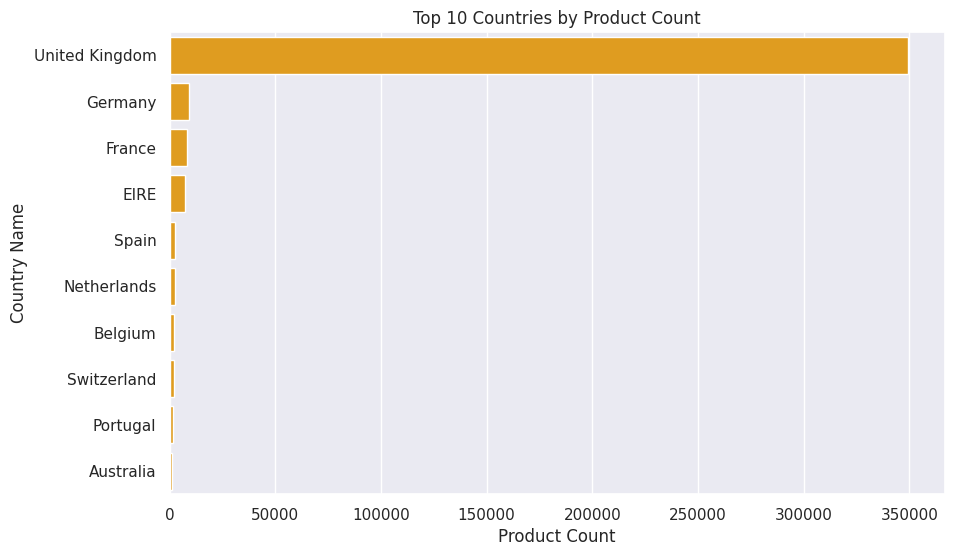

In [23]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Count', y='Country_Name', data=Top_10_country[:10], color='orange')

# Set the title and axis labels
ax.set_title('Top 10 Countries by Product Count')
ax.set_xlabel('Product Count')
ax.set_ylabel('Country Name')

# Show the plot
plt.show()

Maximum orders are received from United Kingdom(UK) as company is UK based so.

### Top 10 countries with highest number of customers

In [24]:
# Create a DataFrame with the number of unique customers per country
customer_count = customer_data.groupby('Country')['CustomerID'].nunique().reset_index()

# Sort the DataFrame by number of customers in descending order
customer_count = customer_count.sort_values(by='CustomerID', ascending=False)

# Select the top 10 countries
top_10_countries = customer_count.head(10)

# Print the top 10 countries by number of customers
print(top_10_countries)


           Country  CustomerID
35  United Kingdom        3921
14         Germany          94
13          France          87
30           Spain          30
3          Belgium          25
32     Switzerland          21
26        Portugal          19
18           Italy          14
12         Finland          12
1          Austria          11


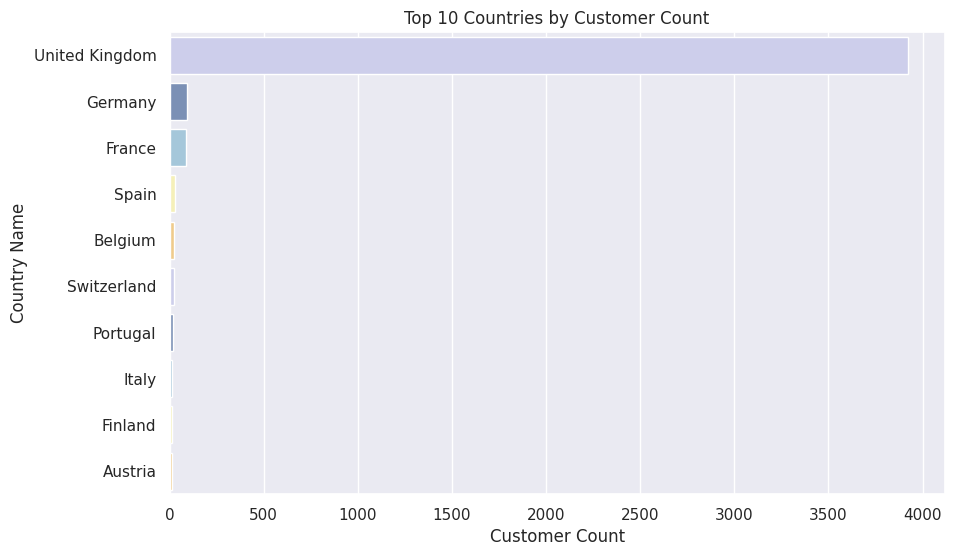

In [25]:
# Create a horizontal bar plot with seaborn
sns.set_style('darkgrid')
# Create a custom color palette
my_palette = ['#C8C9F0', '#718DBF', '#9CC9E3', '#FFF8AF', '#FFD07B']

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='CustomerID', y='Country', data=top_10_countries, palette=my_palette)

# Set the title and axis labels
ax.set_title('Top 10 Countries by Customer Count')
ax.set_xlabel('Customer Count')
ax.set_ylabel('Country Name')

# Show the plot
plt.show()

## Top 10 countries who generated highest revenue

In [26]:

# Add a new column for total cost
customer_data['TotalCost'] = customer_data['Quantity'] * customer_data['UnitPrice']

# Group the data by country and sum the total cost
country_revenue = customer_data.groupby('Country')['TotalCost'].sum().reset_index()

# Sort the countries by revenue and get the top 10 with highest revenue
highest_revenue = country_revenue.sort_values('TotalCost', ascending=False).head(10)
# Print the top 10 countries with highest revenue
print(highest_revenue)


           Country    TotalCost
35  United Kingdom  7285024.644
23     Netherlands   285446.340
10            EIRE   265262.460
14         Germany   228678.400
13          France   208934.310
0        Australia   138453.810
30           Spain    61558.560
32     Switzerland    56443.950
3          Belgium    41196.340
31          Sweden    38367.830


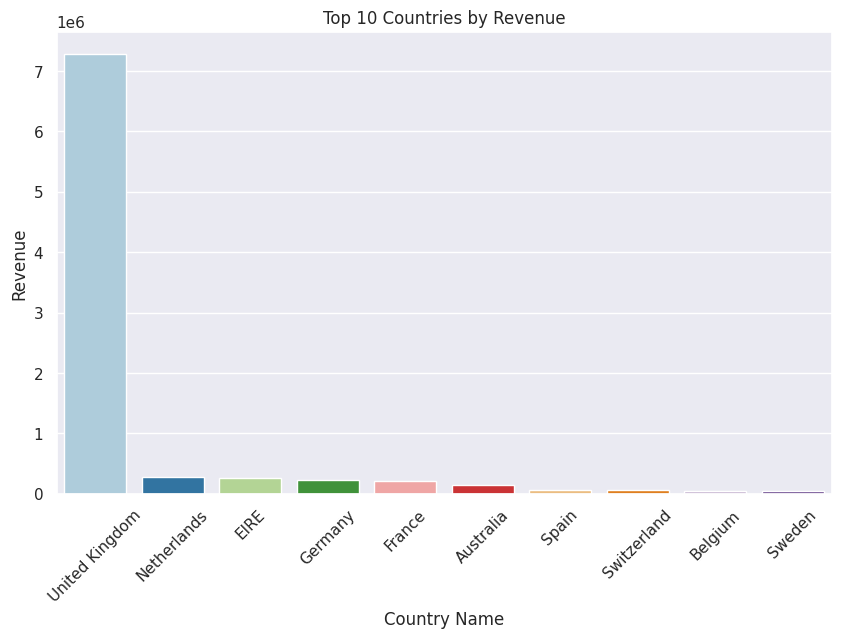

In [27]:
# Create a vertical bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Country', y='TotalCost', data=highest_revenue, palette='Paired')

# Set the title and axis labels
ax.set_title('Top 10 Countries by Revenue')
ax.set_xlabel('Country Name')
ax.set_ylabel('Revenue')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Top 10 Countries generating lowest total revenue

In [28]:
# Add a new column for total cost
customer_data['TotalCost'] = customer_data['Quantity'] * customer_data['UnitPrice']

# Group the data by country and sum the total cost
country_revenue = customer_data.groupby('Country')['TotalCost'].sum().reset_index()

# Sort the countries by revenue and get the top 10 with lowest revenue
lowest_revenue = country_revenue.sort_values('TotalCost').head(10)
# Print the top 10 countries with highest revenue
print(lowest_revenue)

                 Country  TotalCost
28          Saudi Arabia     145.92
2                Bahrain     548.40
8         Czech Republic     826.74
27                   RSA    1002.31
4                 Brazil    1143.60
11    European Community    1300.25
21             Lithuania    1661.06
20               Lebanon    1693.88
34  United Arab Emirates    1902.28
36           Unspecified    2660.77


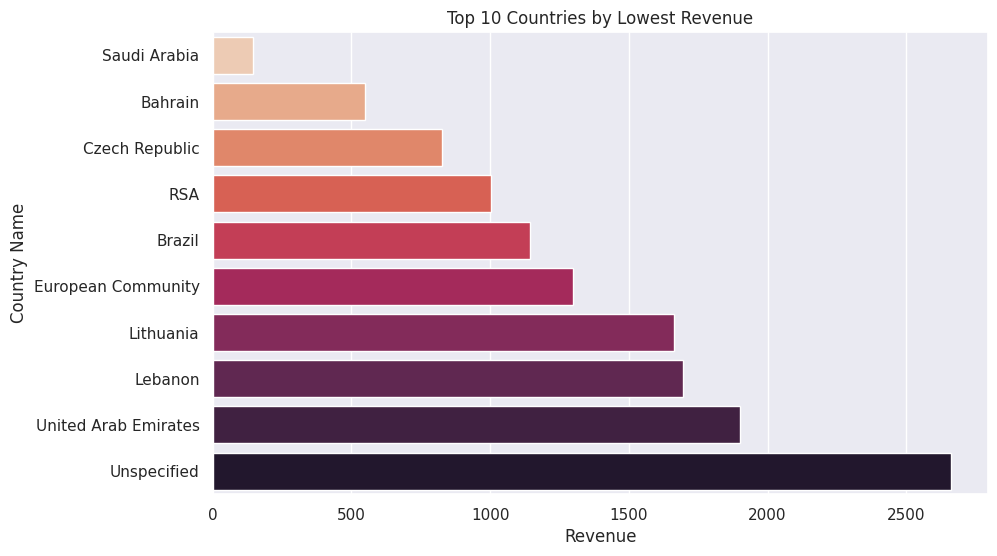

In [29]:
# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='TotalCost', y='Country', data=lowest_revenue, palette='rocket_r')
# Set the title and axis labels
ax.set_title('Top 10 Countries by Lowest Revenue')
ax.set_xlabel('Revenue')
ax.set_ylabel('Country Name')
# Show the plot
plt.show()

### Top 10 countries with highest number of customers

In [30]:
# Group the data by country and customer ID, get unique customer IDs, and count them
customer_counts = customer_data.groupby('Country')['CustomerID'].nunique().reset_index()

# Sort the countries by customer count and get the top 10
top_countries = customer_counts.sort_values('CustomerID', ascending=False).head(10)


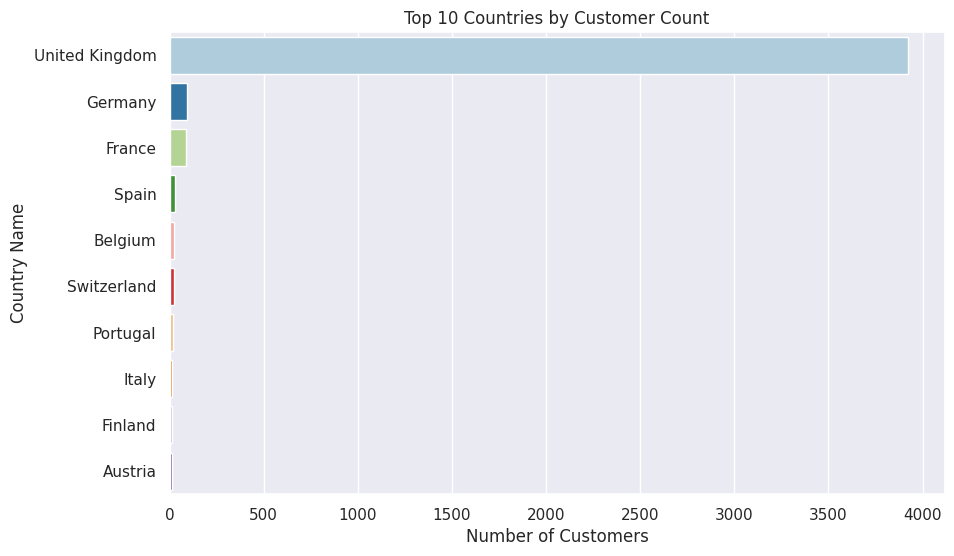

In [31]:
# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,6))
ax = sns.barplot(x='CustomerID', y='Country', data=top_countries, palette='Paired')

# Set the title and axis labels
ax.set_title('Top 10 Countries by Customer Count')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Country Name')

# Show the plot
plt.show()

### Top 10 countries with lowest number of customers

In [32]:
# Group the data by country and customer ID, get unique customer IDs, and count them
customer_counts = customer_data.groupby('Country')['CustomerID'].nunique().reset_index()

# Sort the countries by customer count and get the top 10
low_countries = customer_counts.sort_values('CustomerID').head(10)

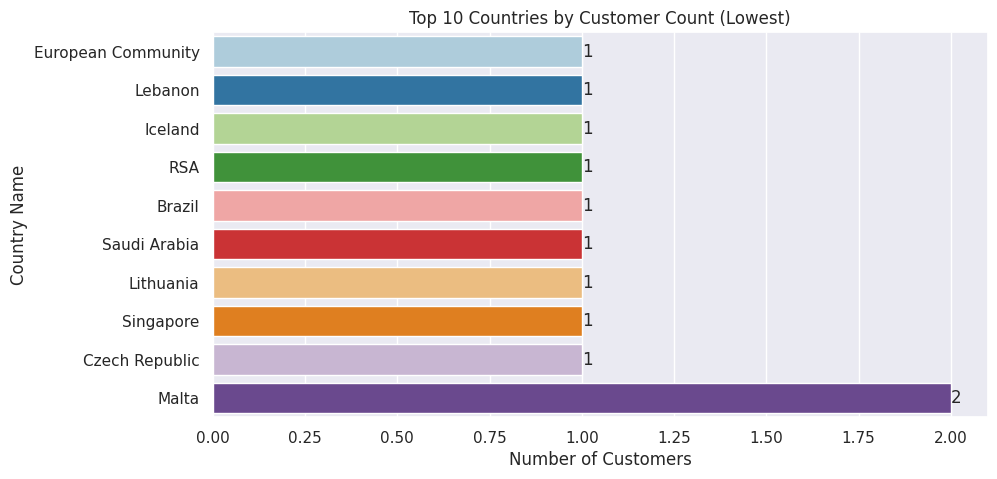

In [33]:
# Create a horizontal bar plot with seaborn
plt.figure(figsize=(10,5))
ax = sns.barplot(x='CustomerID', y='Country', data=low_countries, palette='Paired')

# Set the title and axis labels
ax.set_title('Top 10 Countries by Customer Count (Lowest)')
ax.set_xlabel('Number of Customers')
ax.set_ylabel('Country Name')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()

Top 10 highest selling products

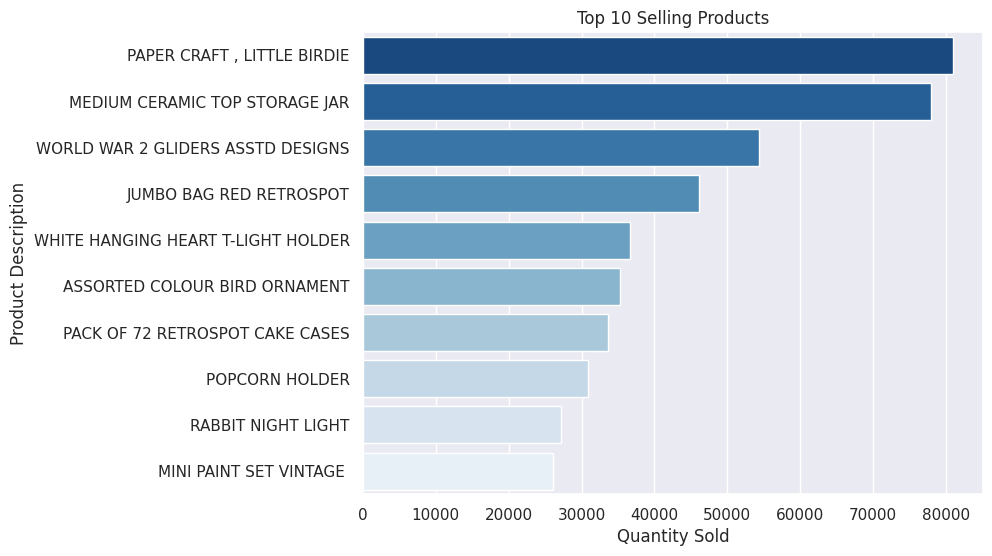

In [34]:
# Group the data by product description and sum the quantity sold
product_sales = customer_data.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by sales and get the top 10
top_products = product_sales.sort_values('Quantity', ascending=False).head(10)

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Quantity', y='Description', data=top_products, palette='Blues_r')

# Set the title and axis labels
ax.set_title('Top 10 Selling Products')
ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Product Description')

# Show the plot
plt.show()


## Top 10 countries with the highest total quantity of products sold

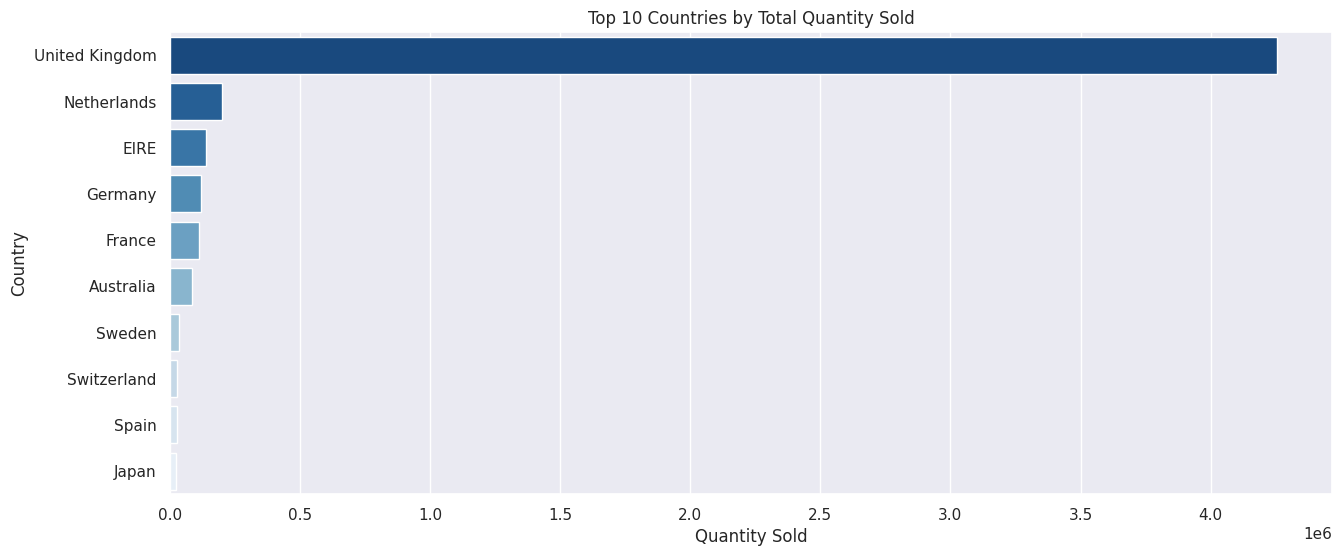

In [35]:
# Group the data by country and sum the quantity sold
country_sales = customer_data.groupby('Country')['Quantity'].sum().reset_index()

# Sort the countries by sales and get the top 10
top_countries = country_sales.sort_values('Quantity', ascending=False).head(10)

# Create a horizontal bar plot with seaborn
plt.figure(figsize=(15,6))
ax = sns.barplot(x='Quantity', y='Country', data=top_countries, palette='Blues_r')

# Set the title and axis labels
ax.set_title('Top 10 Countries by Total Quantity Sold')
ax.set_xlabel('Quantity Sold')
ax.set_ylabel('Country')

# Show the plot
plt.show()


### Top 5 products in United Kingdom

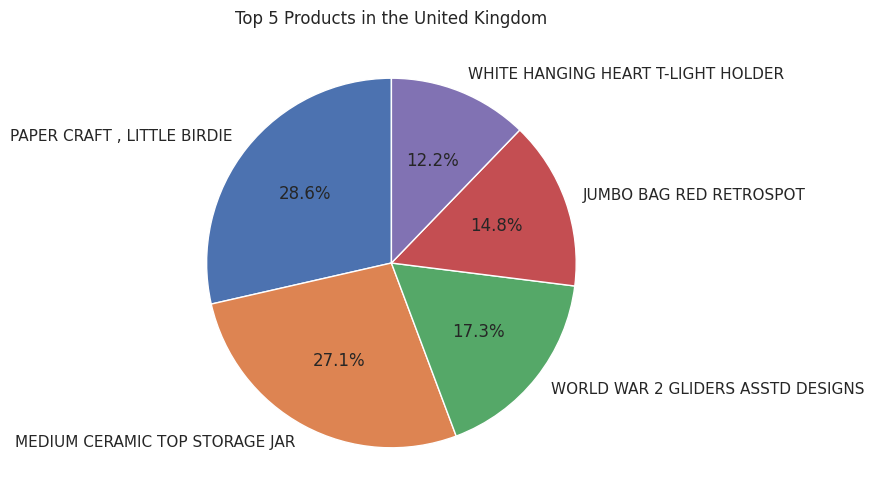

In [36]:
# Filter the data for sales in the United Kingdom
uk_sales = customer_data[customer_data['Country'] == 'United Kingdom']

# Group the data by product description and sum the quantity sold
product_sales = uk_sales.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)

# Create a pie chart with matplotlib
plt.figure(figsize=(8,6))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)

# Set the title
plt.title('Top 5 Products in the United Kingdom')

# Show the plot
plt.show()


### Top 5 products in Germany

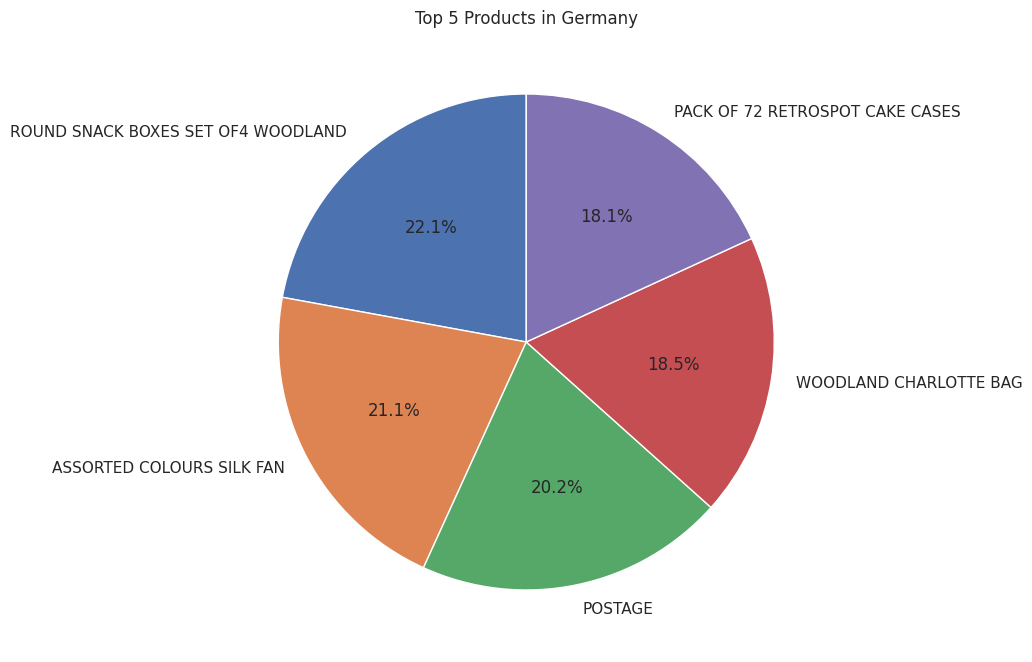

In [37]:
# Filter the data for sales in Germany
germany_sales = customer_data[customer_data['Country'] == 'Germany']
# Group the data by product description and sum the quantity sold
product_sales = germany_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,10))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in Germany')
plt.show()


### Top 5 products in France

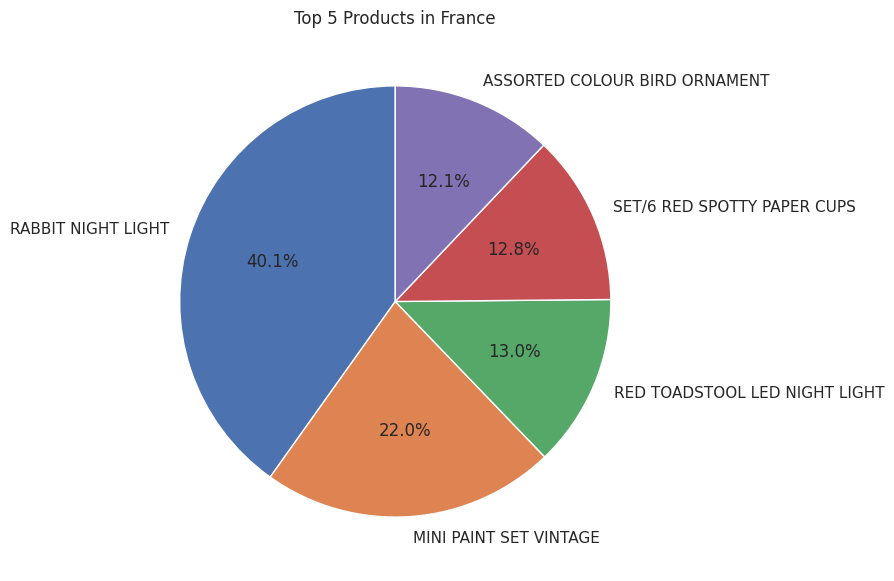

In [38]:
# Filter the data for sales in France
France_sales = customer_data[customer_data['Country'] == 'France']
# Group the data by product description and sum the quantity sold
product_sales = France_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,7))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in France')
plt.show()

Top 5 products in EIRE

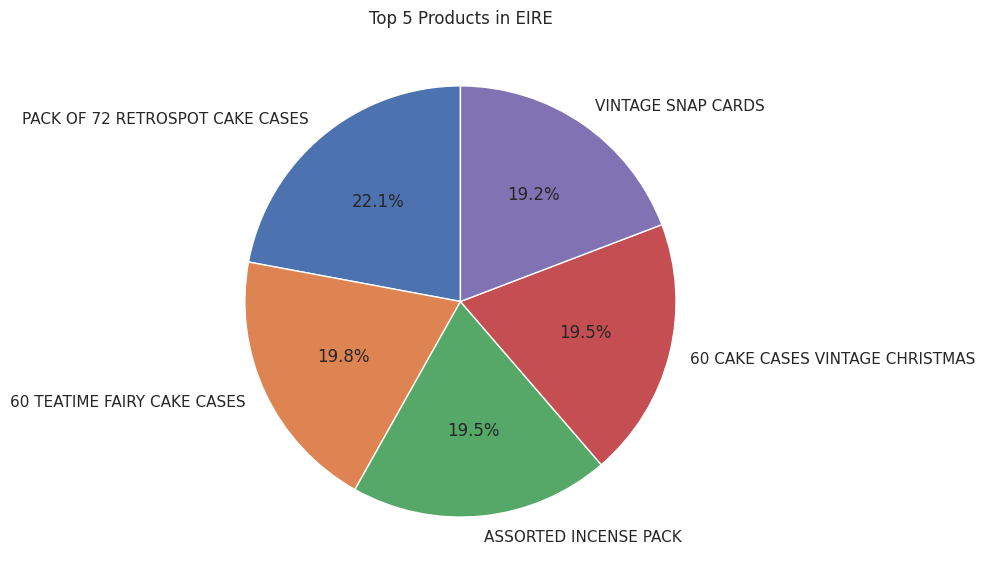

In [39]:
# Filter the data for sales in EIRE
Eire_sales = customer_data[customer_data['Country'] == 'EIRE']
# Group the data by product description and sum the quantity sold
product_sales = Eire_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,7))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in EIRE')
plt.show()

Top 5 products in Spain


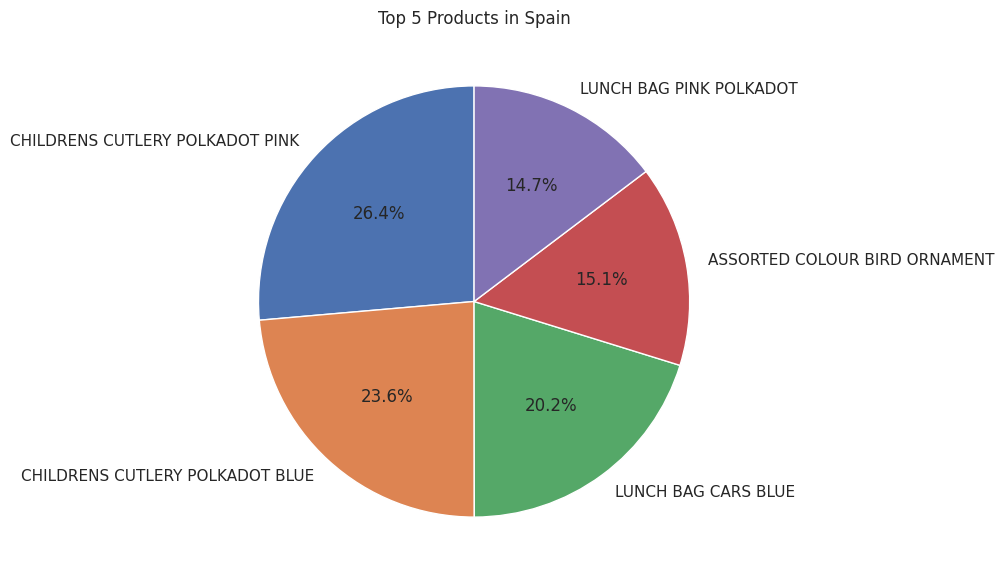

In [40]:
Spain_sales = customer_data[customer_data['Country'] == 'Spain']
# Group the data by product description and sum the quantity sold
product_sales = Spain_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,7))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in Spain')
plt.show()

### Top 5 products in Norway

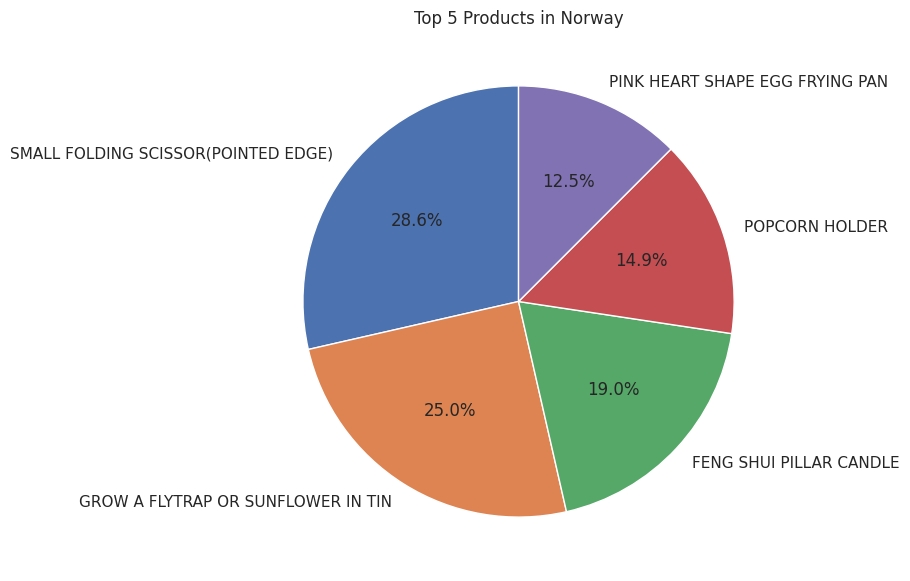

In [41]:
Norway_sales = customer_data[customer_data['Country'] == 'Norway']
# Group the data by product description and sum the quantity sold
product_sales = Norway_sales.groupby('Description')['Quantity'].sum().reset_index()
# Sort the products by sales and get the top 5
top_products = product_sales.sort_values('Quantity', ascending=False).head(5)
# Create a bar chart with matplotlib
plt.figure(figsize=(8,7))
plt.pie(top_products['Quantity'], labels=top_products['Description'], autopct='%1.1f%%', startangle=90)
# Set the title and labels
plt.title('Top 5 Products in Norway')
plt.show()

Understanding the skewness of our data

<Axes: title={'center': 'distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

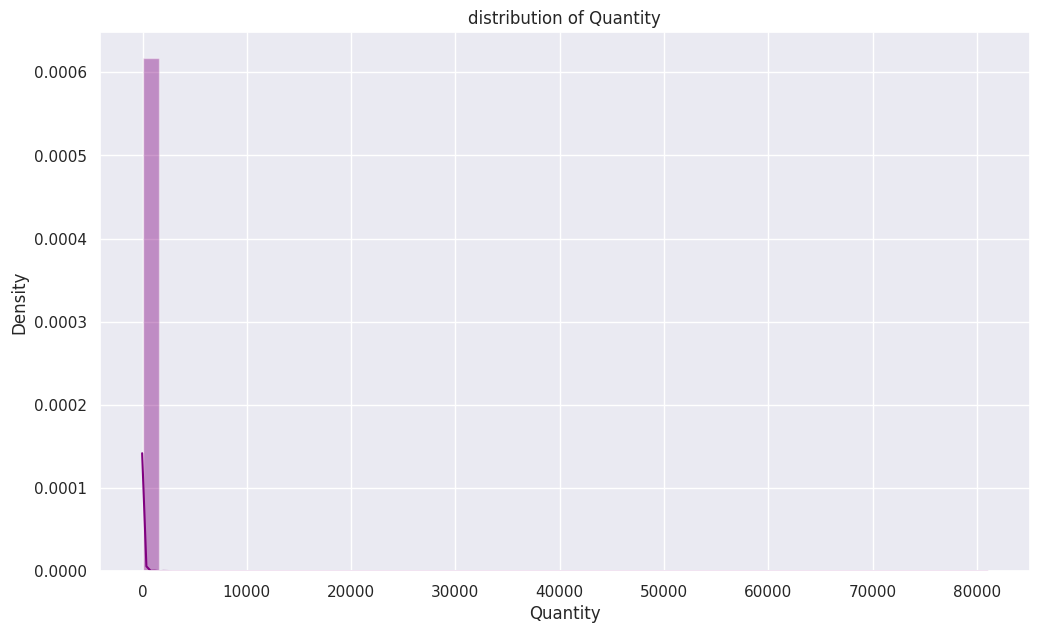

In [42]:
#distribution of Quantity
plt.figure(figsize=(12,7))
plt.title('distribution of Quantity')
sns.distplot(customer_data['Quantity'],color="Purple")

<Axes: title={'center': 'distribution of UnitPrice'}, xlabel='UnitPrice', ylabel='Density'>

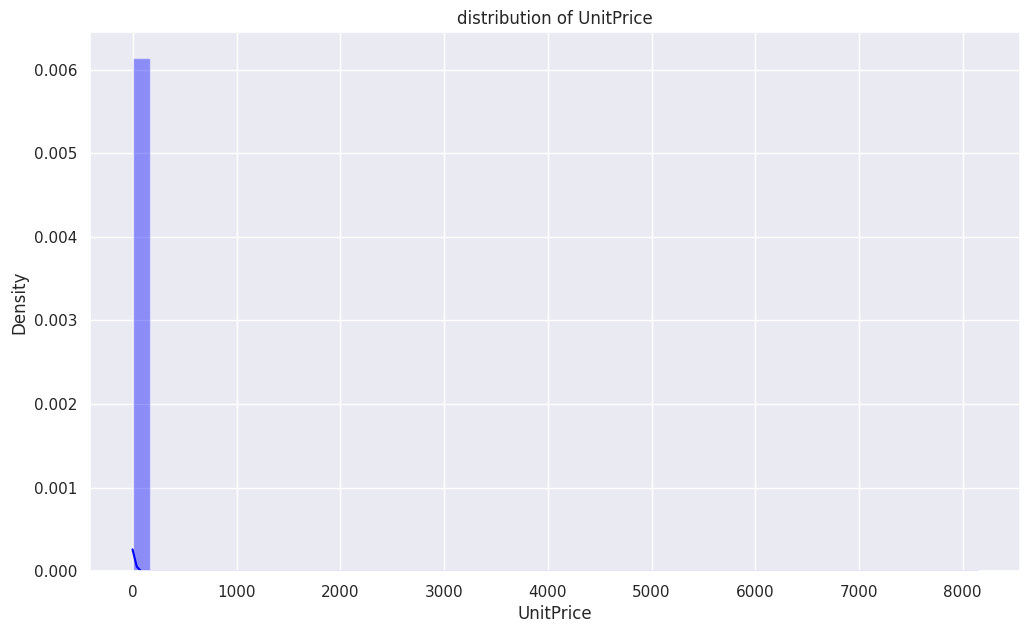

In [43]:
#distribution of UnitPrice
plt.figure(figsize=(12,7))
plt.title('distribution of UnitPrice')
sns.distplot(customer_data['UnitPrice'],color="blue")

<Axes: title={'center': 'log distribution of Quantity'}, xlabel='Quantity', ylabel='Density'>

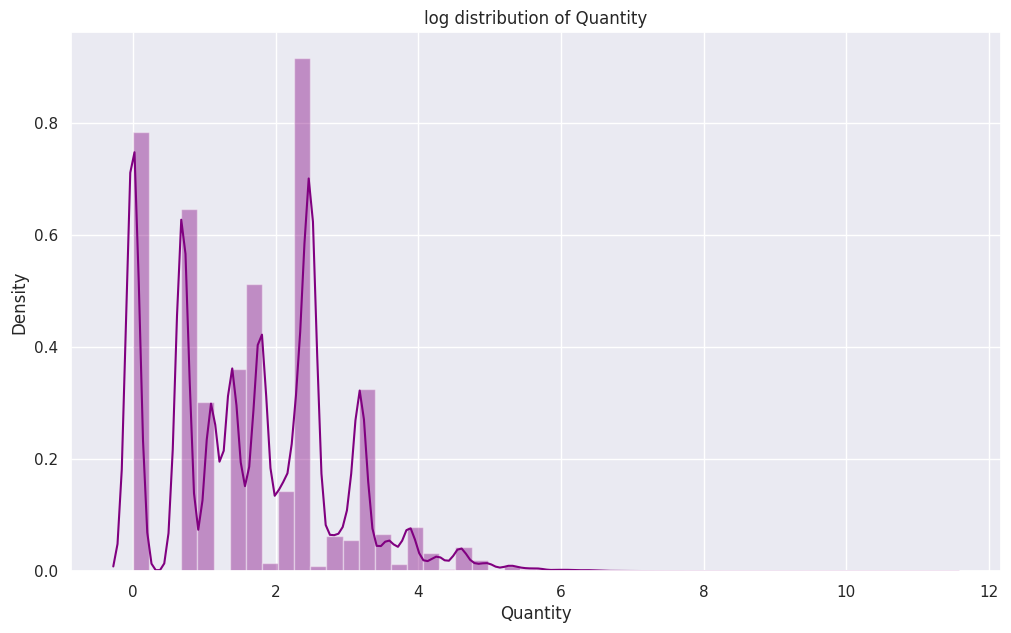

In [44]:
#Log transformation on distribution of Quantity 
plt.figure(figsize=(12,7))
plt.title('log distribution of Quantity')
sns.distplot(np.log(customer_data['Quantity']),color="Purple")

Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

#**Feature engineering**

In [45]:
# Convert the 'InvoiceDate' column to datetime format
customer_data["InvoiceDate"] = pd.to_datetime(customer_data["InvoiceDate"], format="%m/%d/%y %H:%M")
# Extract new features from the 'InvoiceDate' column
customer_data['Day'] = customer_data['InvoiceDate'].dt.day_name()
customer_data["year"] = customer_data["InvoiceDate"].apply(lambda x: x.year)
customer_data["month_num"] = customer_data["InvoiceDate"].apply(lambda x: x.month)
customer_data["day_num"] = customer_data["InvoiceDate"].apply(lambda x: x.day)
customer_data["hour"] = customer_data["InvoiceDate"].apply(lambda x: x.hour)
customer_data["minute"] = customer_data["InvoiceDate"].apply(lambda x: x.minute)
customer_data['Month'] = customer_data['InvoiceDate'].dt.month_name()
# View the updated dataframe
customer_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Day,year,month_num,day_num,hour,minute,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,Wednesday,2010,12,1,8,26,December
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,2010,12,1,8,28,December
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,Wednesday,2010,12,1,8,28,December
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,Wednesday,2010,12,1,8,34,December


In [46]:
# Create a new features TotalAmount from form product of Quantity and Unitprice
customer_data['TotalAmount']=customer_data['Quantity']*customer_data['UnitPrice']
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,Day,year,month_num,day_num,hour,minute,Month,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,2010,12,1,8,26,December,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,2010,12,1,8,26,December,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,2010,12,1,8,26,December,20.34


Checking sales daywise

In [47]:
# on which day most of the order is placed 
day_df = customer_data['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name','Day': 'Count'}, inplace=True)
day_df.head(4)

,Day_Name,Count
0,Thursday,79260
1,Wednesday,68043
2,Tuesday,65747
3,Monday,64237


<Axes: title={'center': '% of shopping as per Days'}, xlabel='Day_Name', ylabel='Count'>

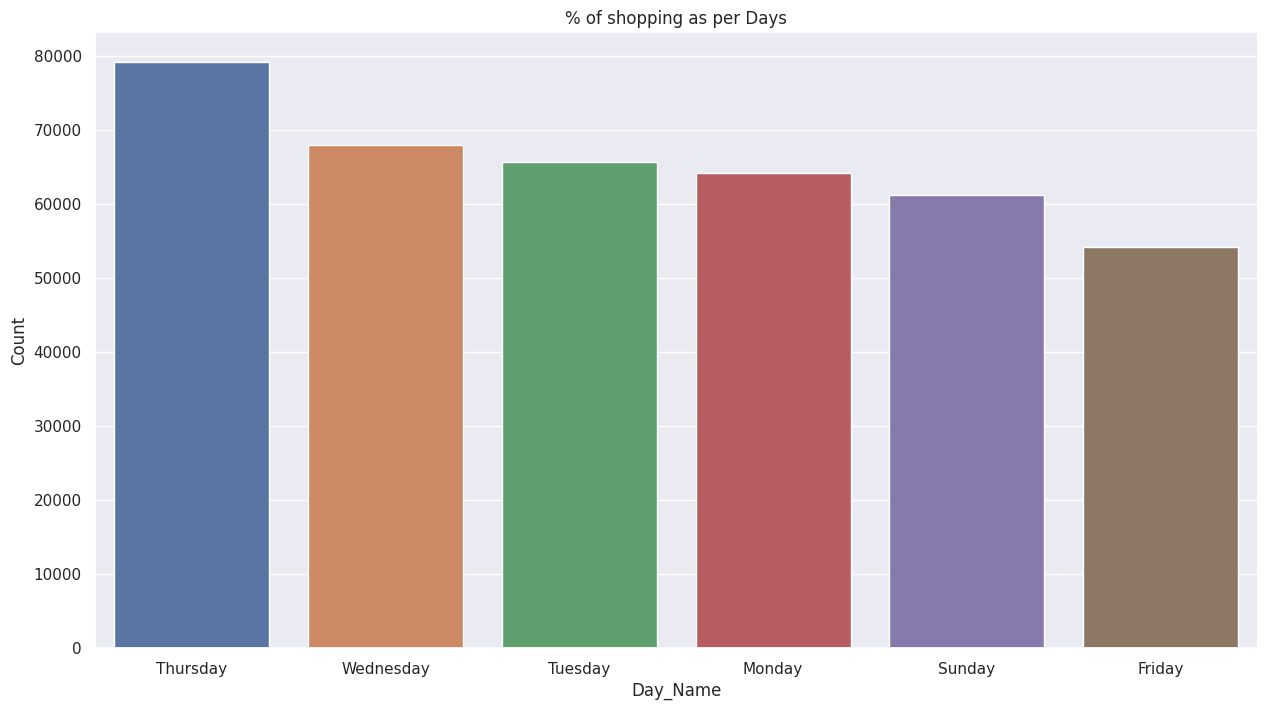

In [48]:
# Plotting the number of shopping as per days
fig, ax = plt.subplots(figsize = (15,8))
plt.title('% of shopping as per Days')
sns.barplot(x= 'Day_Name', y='Count',data=day_df)

Maximum number of shopping occurs in Thursday, followed by Wednesday and Tuesday and less on Friday & Sunday.

### Checking Monthly wise selling

In [49]:
# plotting Monthly wise selling
month_df = customer_data['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name','Month': 'Count'}, inplace=True)
month_df.head()

,Month_Name,Count
0,November,63182
1,October,48796
2,December,42699
3,September,39671
4,May,28075


Text(0.5, 1.0, 'MONTHLY PURCHASES')

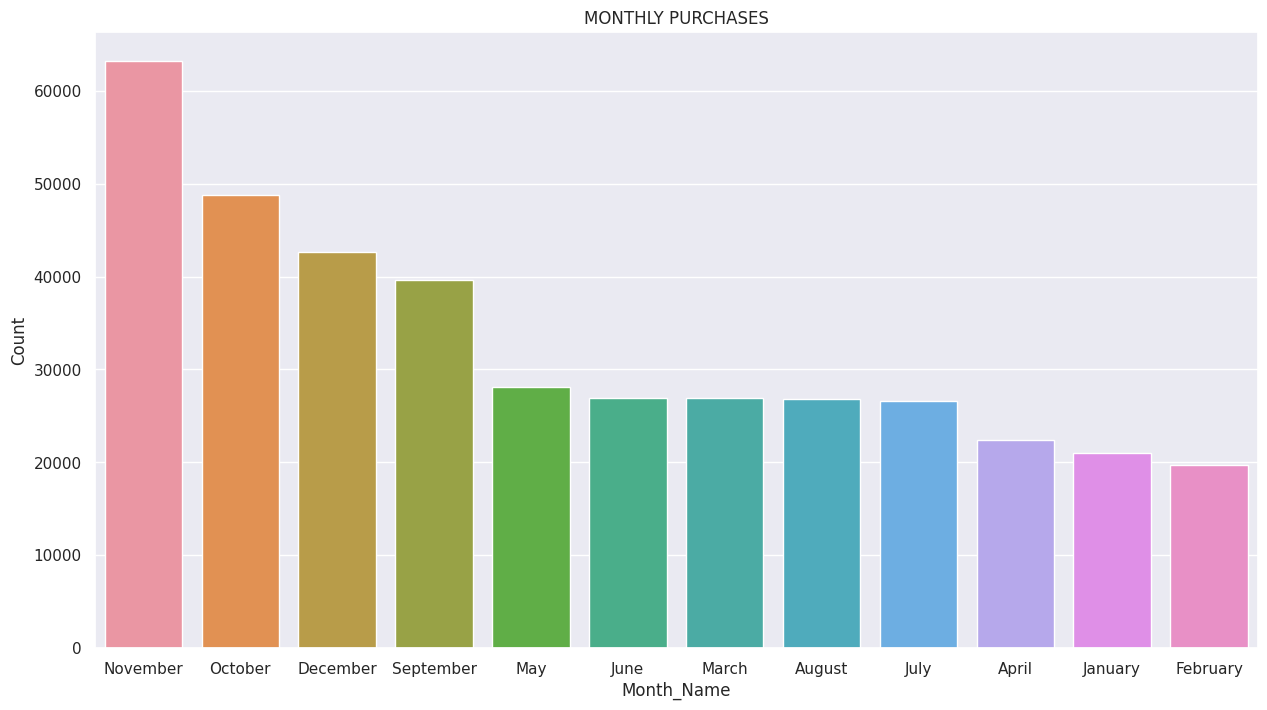

In [50]:
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x='Month_Name',y='Count',data = month_df)
plt.title('MONTHLY PURCHASES')

Most of the bookings were made in the month of November, October, December and September, so these months are peak in business expansion and need to look after more customer satisfaction And less bookings were made in the month of April, january and February

### Understanding the customer purchase timr in most items?

<Axes: title={'center': 'Distribution of days'}, xlabel='Time_type', ylabel='count'>

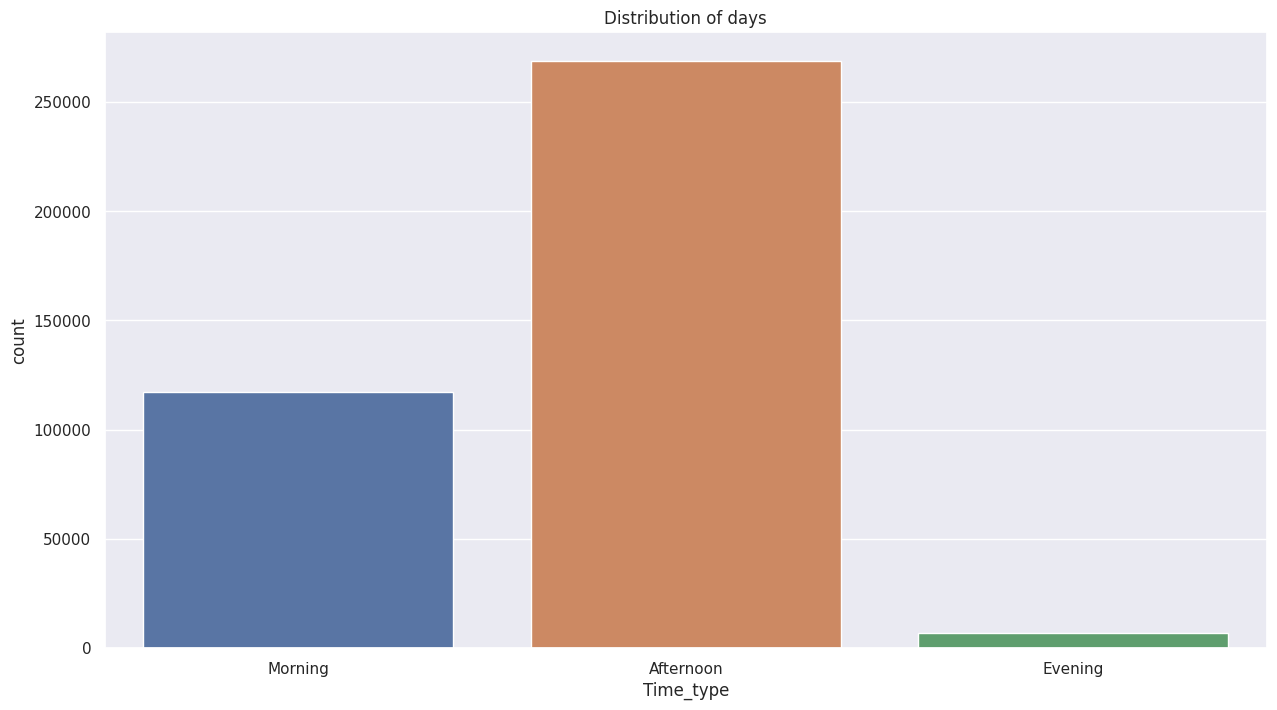

In [51]:
# Creating a function to apply for purchase time
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'
# applying to our data
customer_data['Time_type']=customer_data['hour'].apply(time_type)

#Plotting distribute of day in Morining, Afternoon and Evening
fig, ax = plt.subplots(figsize = (15,8))
plt.title('Distribution of days')
sns.countplot(x='Time_type',data=customer_data)

Most of the customers have purches the items in Afternoon , moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening.

# RMF strategy

As we can see from the original data, that there are no such features on which basis the customers could be segmented. RMF strategy is used in such cases where revenue is the major outcome and where the company is more focused towards revenue and customers.

Three groupings are created:

* Monetary: Grouping CustomerID and Total Revenue per customer
* Frequency: Grouping CustomerID and total number of Invoices per customer
* Recency: Grouping the difference of current date and Invoice Date of invoices per customer in days, and the CustomerID

In [52]:
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = customer_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                       'InvoiceNo': 'Frequency', 
                      'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Text(0.5, 0, 'Recency')

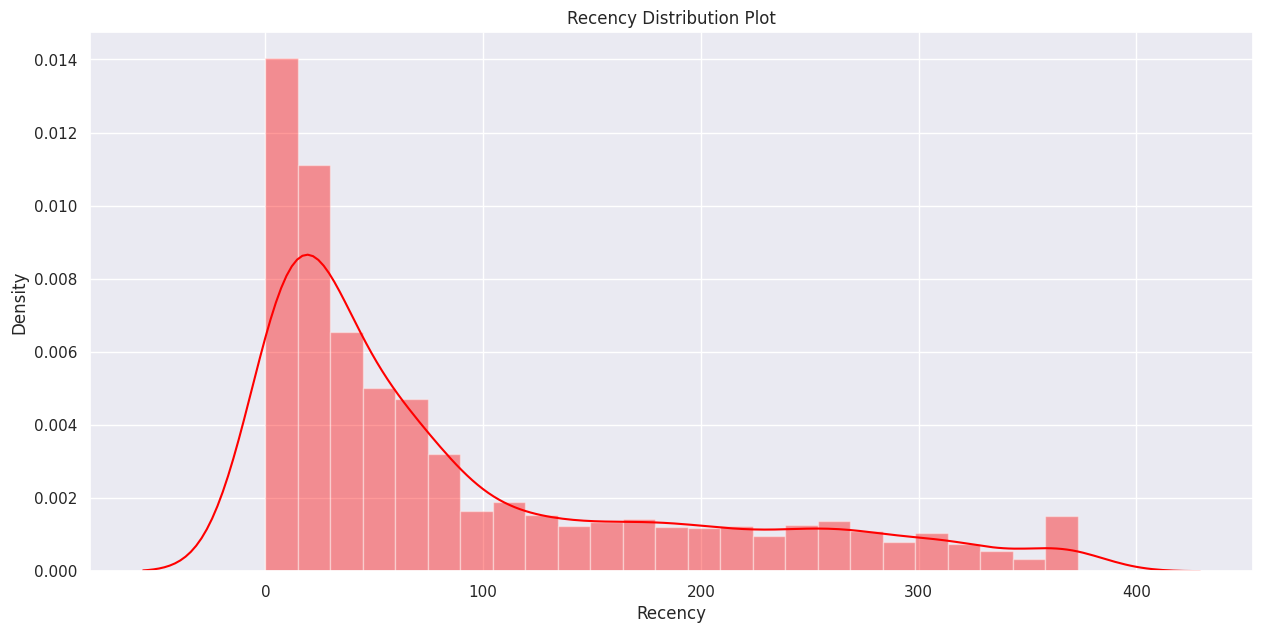

In [53]:
#Creating a Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(15,7))
sns.distplot(x, color = 'red')
plt.title('Recency Distribution Plot')
plt.xlabel('Recency')

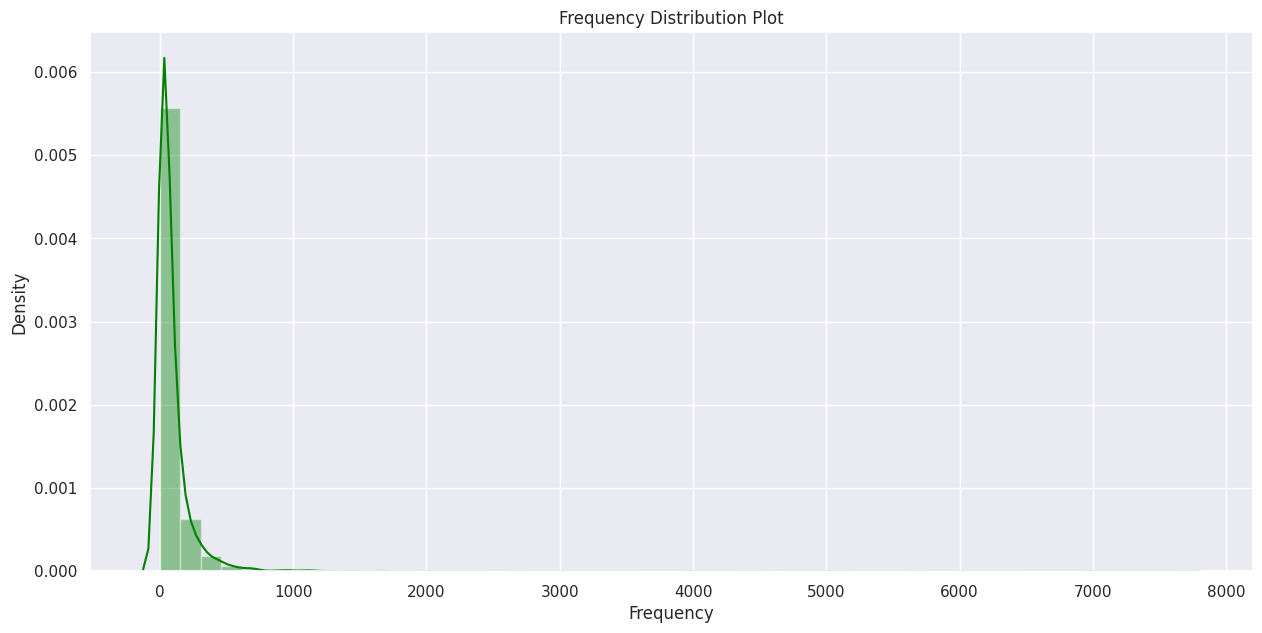

In [54]:
# Creating a Frequency Distribution plot
x = rfm_df['Frequency']
plt.figure(figsize=(15,7))
sns.distplot(x, color='green')
plt.title('Frequency Distribution Plot')
plt.xlabel('Frequency')
plt.show()


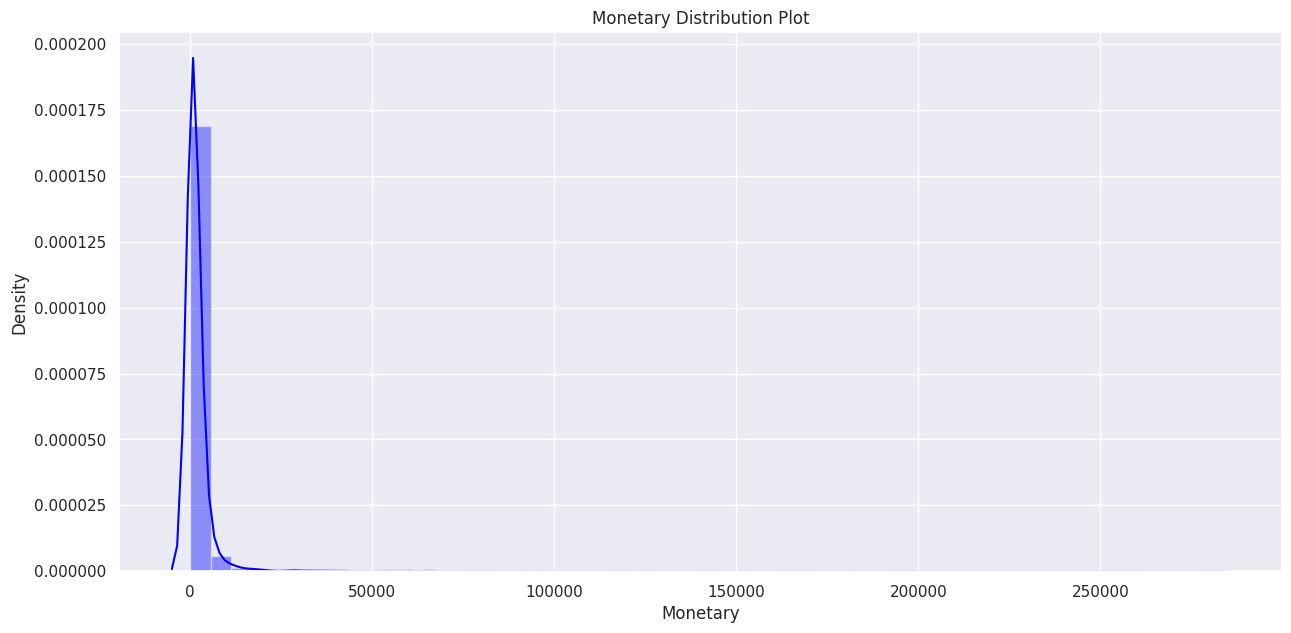

In [55]:
#Creating a Monetary distribution plot
x = rfm_df['Monetary']
plt.figure(figsize=(15,7))
sns.distplot(x, color='blue')
plt.title('Monetary Distribution Plot')
plt.xlabel('Monetary')
plt.show()

All distplots are rightly skewed data or positively skewed
From recency its says that there is a huge set of customer who comes very frequently to purchase

In [56]:
#Creating a function to Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
  if num <= 0:
      return 1
  else:
      return num
        
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

In [57]:
#Performing Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

<Axes: xlabel='Recency', ylabel='Density'>

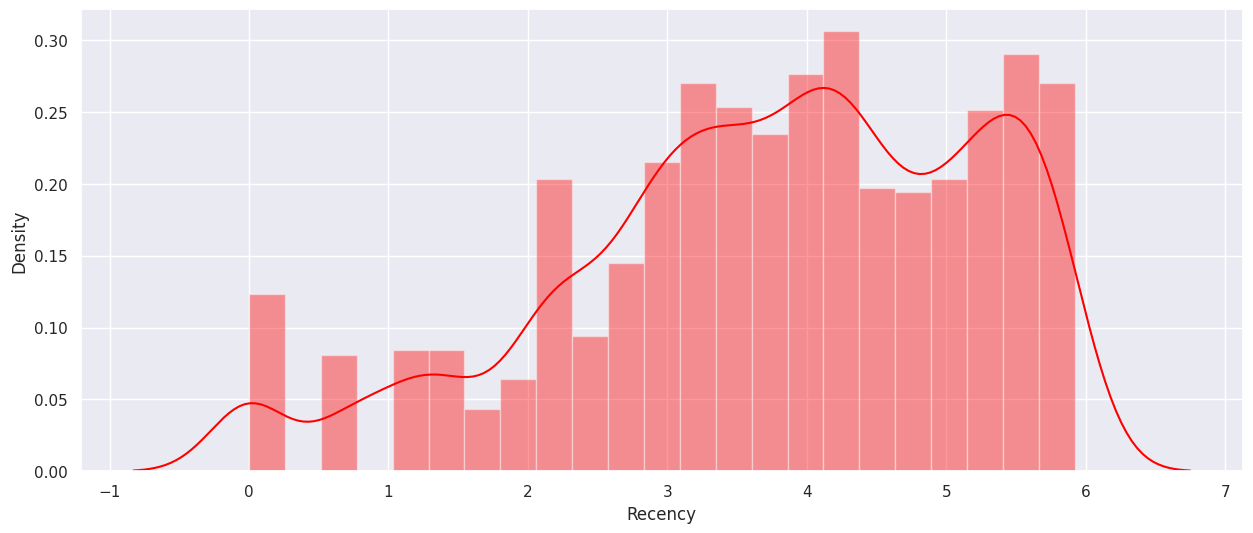

In [58]:
# Creating a Data distribution plot after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(15,6))
sns.distplot(Recency_Plot, color='red')

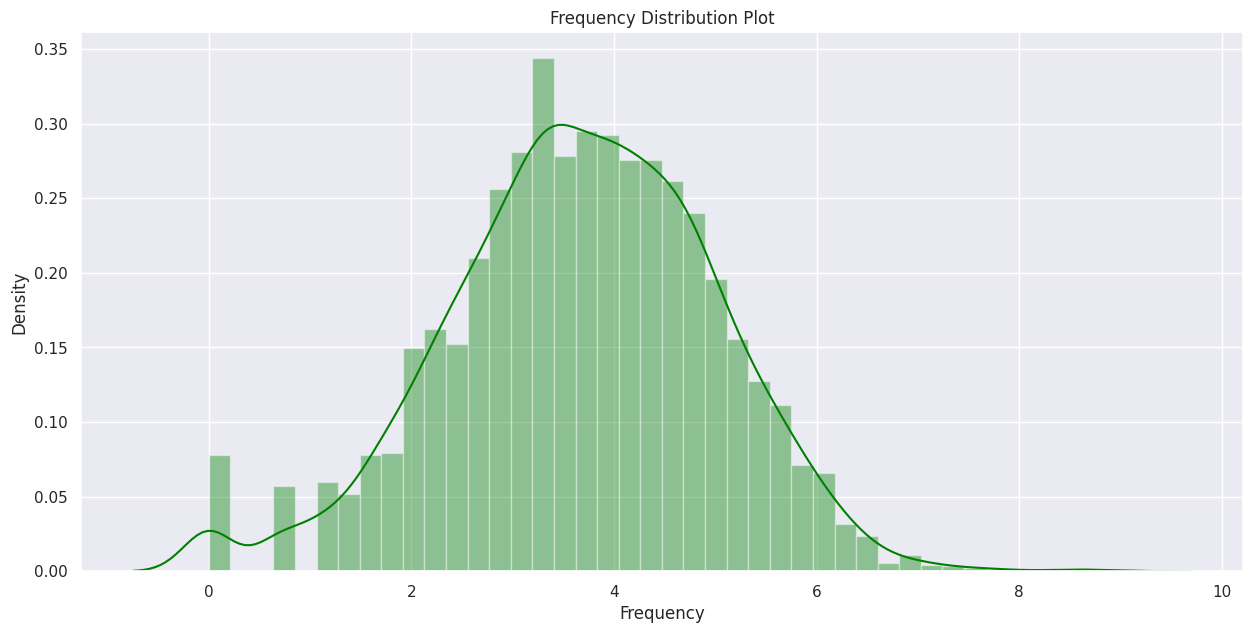

In [59]:
# Creating a data distribution plot after log transformation on frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(15,7))
sns.distplot(Frequency_Plot, color='green')
plt.title('Frequency Distribution Plot')
plt.xlabel('Frequency')
plt.show()

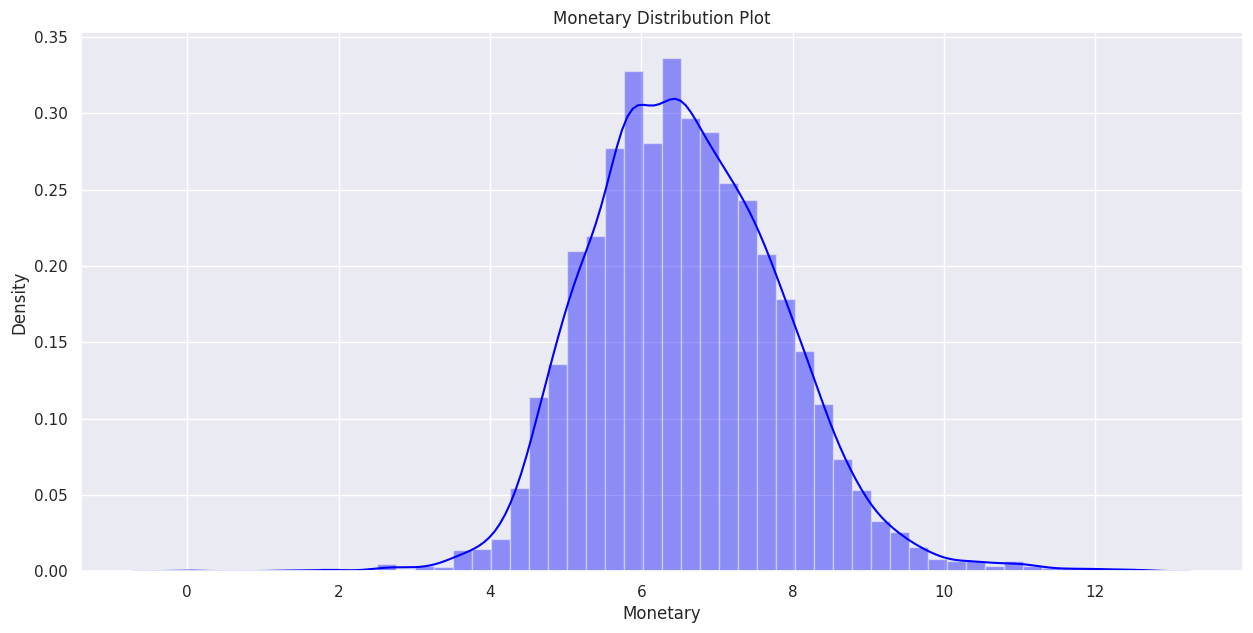

In [60]:
# Creating a data distribution plot after log transformation on Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(15,7))
sns.distplot(Monetary_Plot, color='blue')
plt.title('Monetary Distribution Plot')
plt.xlabel('Monetary')
plt.show()

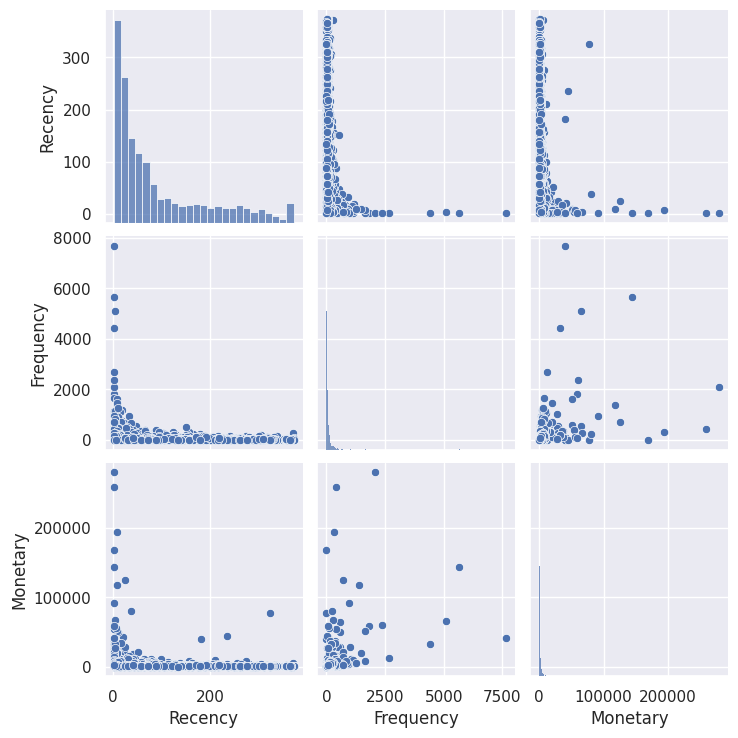

In [61]:
# Understanding the relation between recency, frequency and monetary on pairplot
sns.pairplot(rfm_df)

In [62]:
# Splitting the data into 4 quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 306.45500000000004,
  0.5: 668.5600000000002,
  0.75: 1660.315}}

In [63]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler, Normalizer

In [64]:
# Creating a copy of the rfm dataframe
rfm_df_copy = rfm_df.copy()

In [65]:
# Scaling the dataframe through standardscaler
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df_copy)
scaled_data = normal.fit_transform(scaled_data)

In [66]:
# Storing those value ina dataframe
rfm_scaled = pd.DataFrame(scaled_data, columns = ['Recency','Frequency','Monetary'])
rfm_scaled.set_index(rfm_df_copy.index, inplace=True)
# viewing the data
rfm_scaled.head(4)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.268052,-0.045673,0.962321
12347.0,-0.883497,0.398027,0.246998
12348.0,-0.540535,-0.836647,-0.088565
12349.0,-0.993609,-0.104197,-0.043412


In [67]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
      return 1
  elif x <= d[p][0.50]:
      return 2
  elif x <= d[p][0.75]: 
      return 3
  else:
      return 4
    
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
      return 4
  elif x <= d[p][0.50]:
      return 3
  elif x <= d[p][0.75]: 
      return 2
  else:
      return 1

In [68]:
# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [69]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [70]:
# Checking the summary of RFM
rfm_df.RFMScore.describe()

count    4339.000000
mean        7.506338
std         2.814398
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMScore, dtype: float64

### Outliers Detection using boxplot

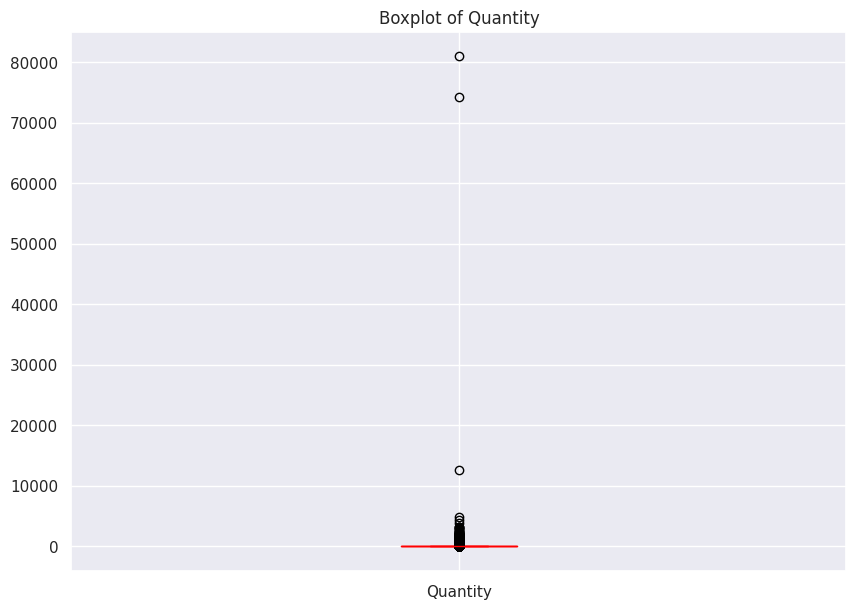

In [71]:
# plotting for Quantity variable
fig,ax = plt.subplots(figsize=(10, 7))
customer_data.boxplot(column='Quantity', color='red', ax=ax)
ax.set_title('Boxplot of Quantity')
plt.show()

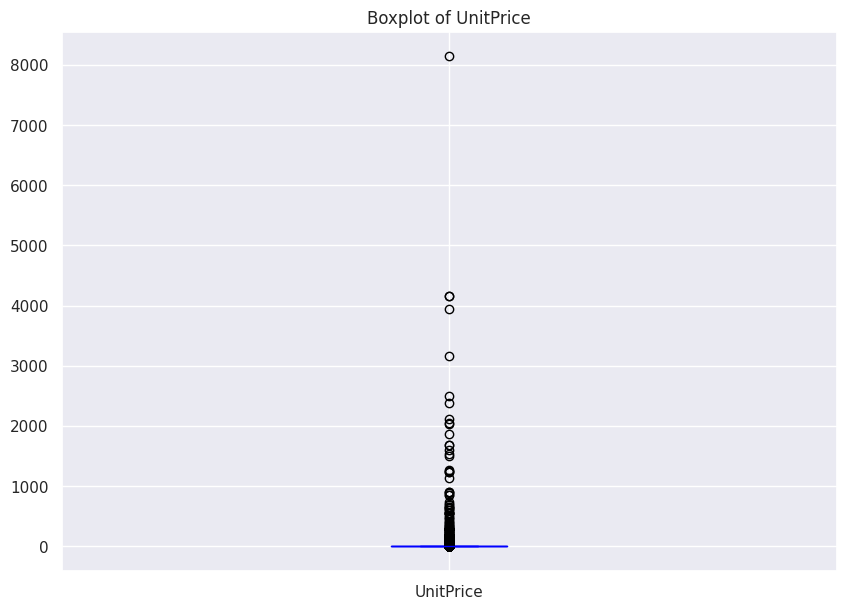

In [72]:
# plotting for UnitPrice variable
fig,ax = plt.subplots(figsize=(10, 7))
customer_data.boxplot(column='UnitPrice', color='blue', ax=ax)
ax.set_title('Boxplot of UnitPrice')
plt.show()

In [73]:
# Creating a function to remove outliers
def remove_outliers(df , column):
  '''Removes outliers in given the dataframe and column'''
  q3 = df[column].quantile(0.75)
  q1 = df[column].quantile(0.25)
  iqr = q3 - q1
  upper_limit = q3 + (1.5 * iqr)
  lower_limit = q1 - (1.5 * iqr)

  if lower_limit < 0:
    df = df[df[column] <= upper_limit]
  else:
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]   
  
  return df

In [74]:
# Removing the outliers using the function created
df = remove_outliers(df = customer_data, column = 'Quantity')
df = remove_outliers(df = customer_data, column = 'UnitPrice')

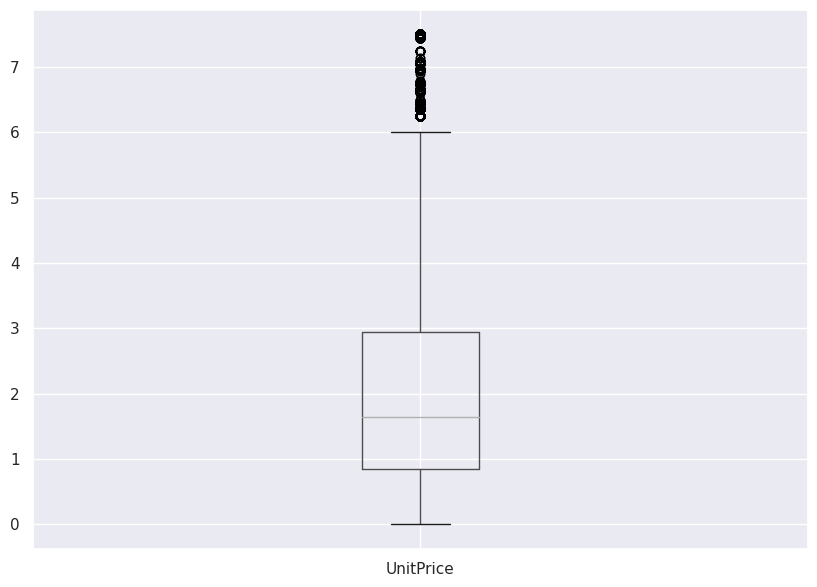

In [75]:
# After removing outliers
fig = plt.figure(figsize=(10, 7))
ax = fig.gca()
df.boxplot(column =['UnitPrice'], ax = ax)
plt.show()

Understanding through Heatmap

Text(0.5, 1.0, 'CORRELTAION data')

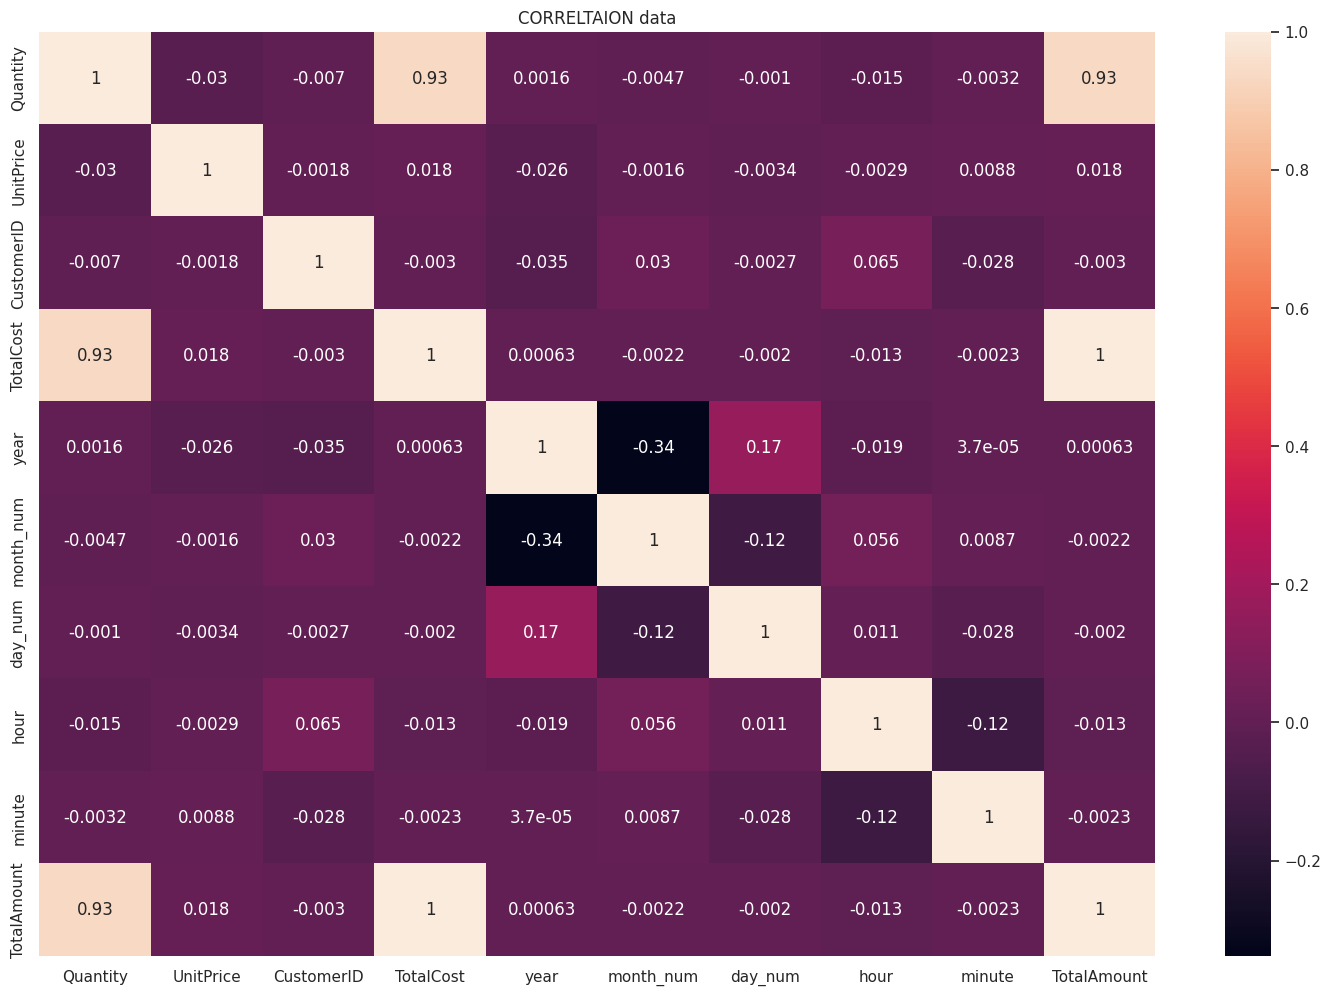

In [76]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot = True)
plt.title('CORRELTAION data')

# Model implementation

## K-Means Clustering

In [77]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [78]:
# Creating a object for kmeans model
kmeans = KMeans()

## ELBOW METHOD

In [79]:
# Using the elbow method to find out optimum number of clusters, with different metrics
def elbow_method(X):
  ''' Displays elbow curves with different metrics '''
  metrics = ['distortion', 'calinski_harabasz', 'silhouette']
  for m in metrics:
    visualizer = KElbowVisualizer(kmeans, k = (2,10), metric = m)
    visualizer.fit(X)
    visualizer.poof()

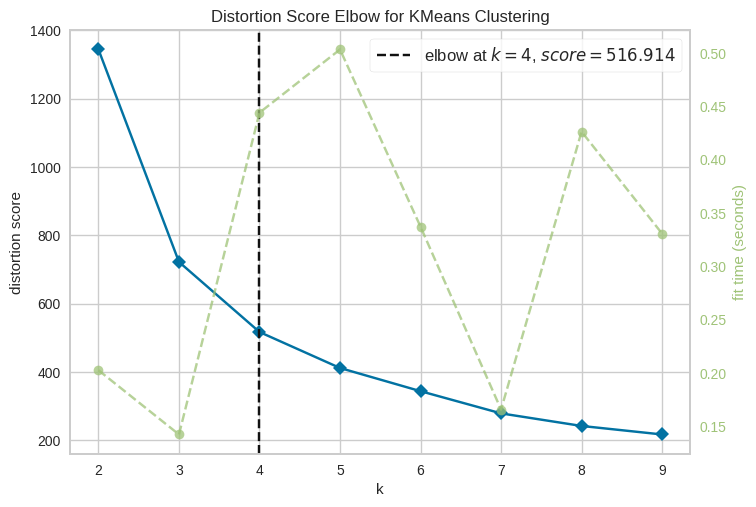

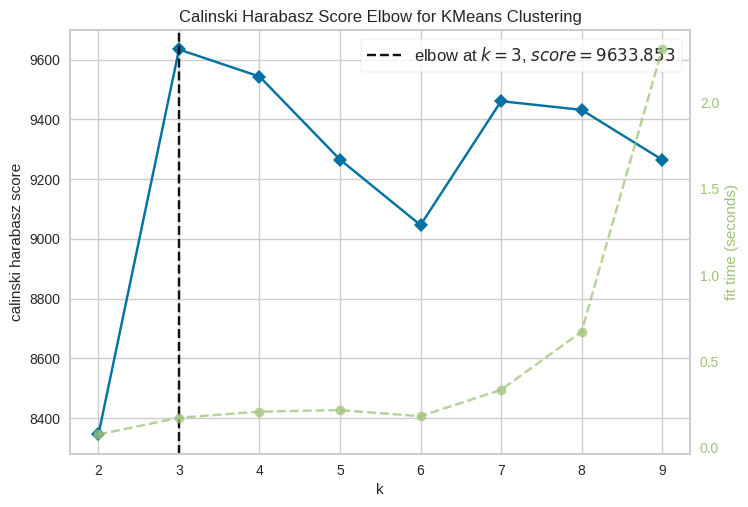

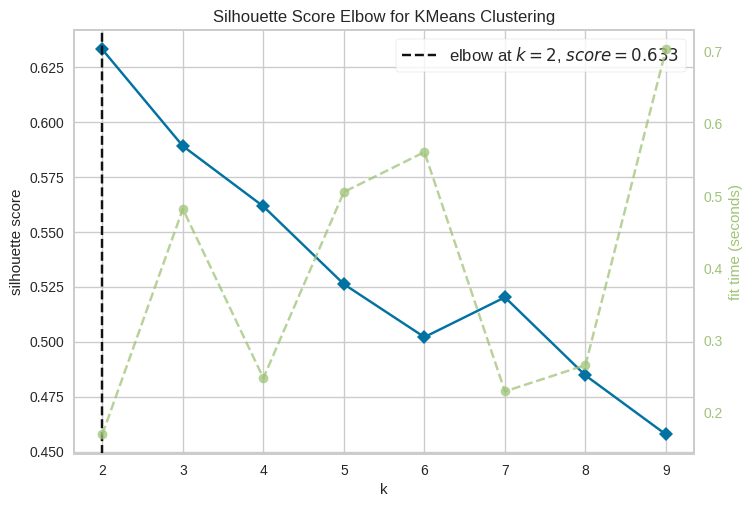

In [80]:
# Using the elbow method function to understand optimum number of clusters
elbow_method(rfm_scaled)

# Silhouette Analysis

In [81]:
# Creating a function to calculate silhouette scores
def sil_score(input, k):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''
  
  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])
  
  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : i,
                            'Silhouette Score' : score}, ignore_index = True)
  
  return sil_df

In [82]:
# Using the function to display silhoutte scores at different number of clusters
sil_score(rfm_scaled,10)

,Clusters,Silhouette Score
0,2.0,0.632945
1,3.0,0.589059
2,4.0,0.560767
3,5.0,0.525913
4,6.0,0.502158
5,7.0,0.518979
6,8.0,0.484982
7,9.0,0.459707
8,10.0,0.474729


In [83]:
# Creating a function for silhouette plot visualization
def sil_visual(input, k):
  ''' Visualize the silhouette plot with different clusters'''
  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

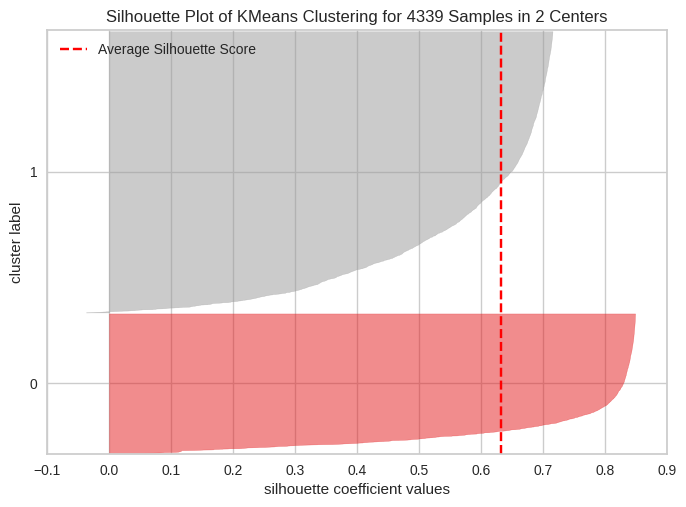

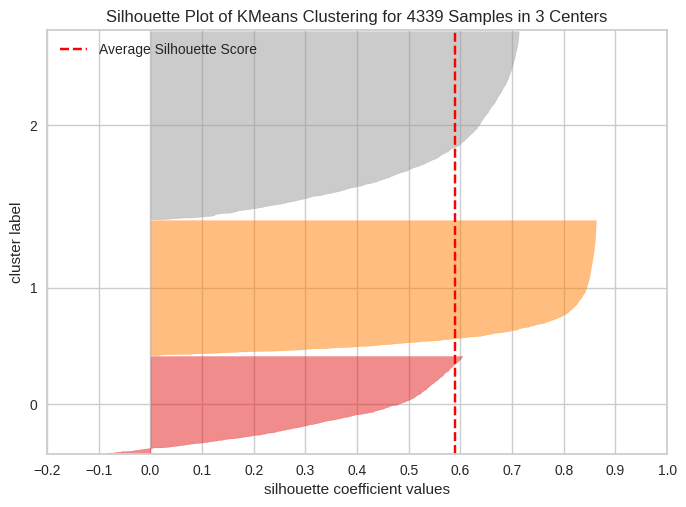

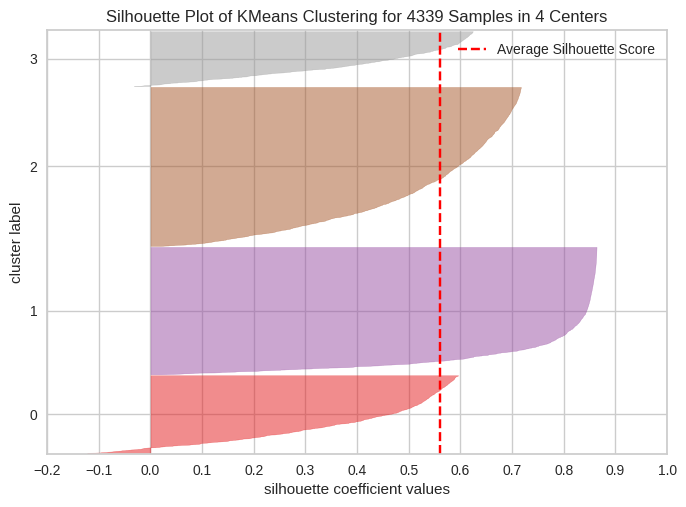

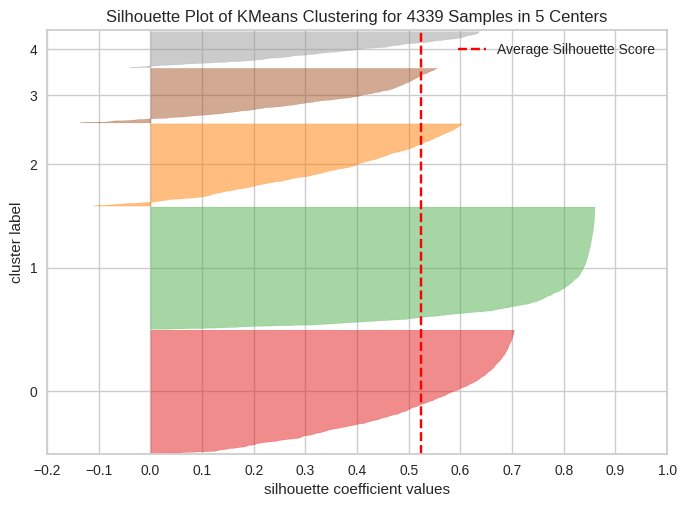

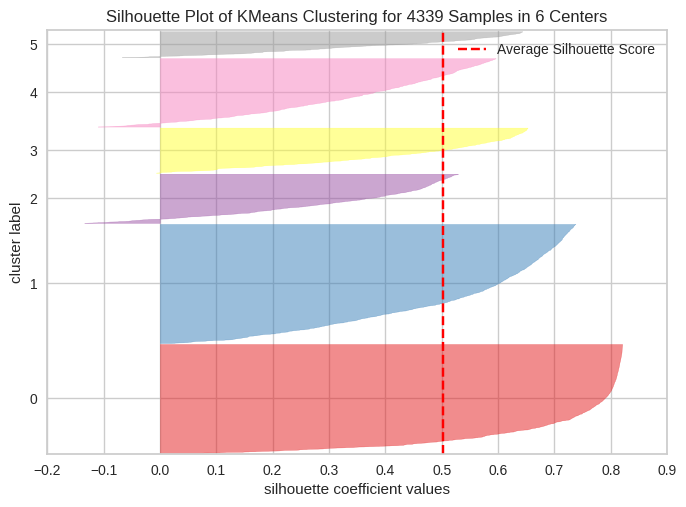

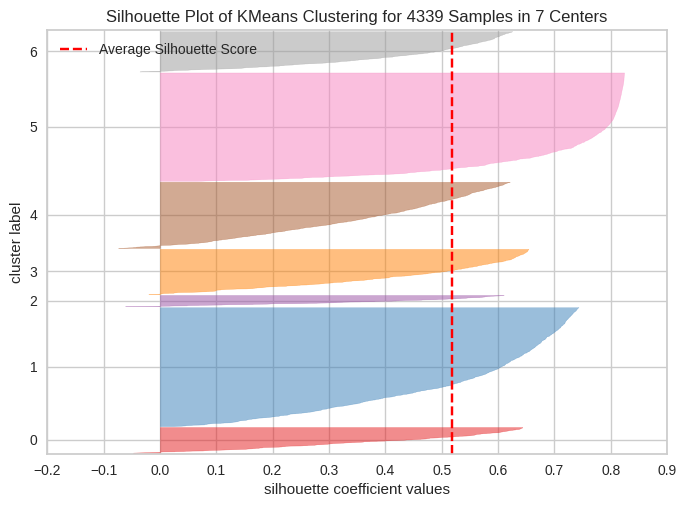

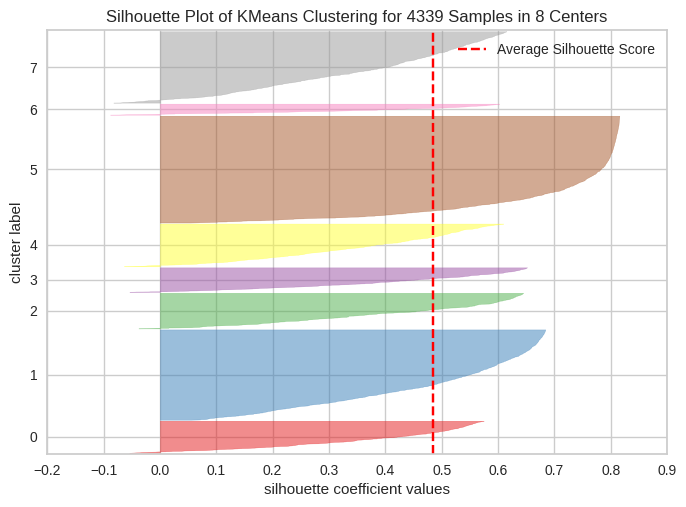

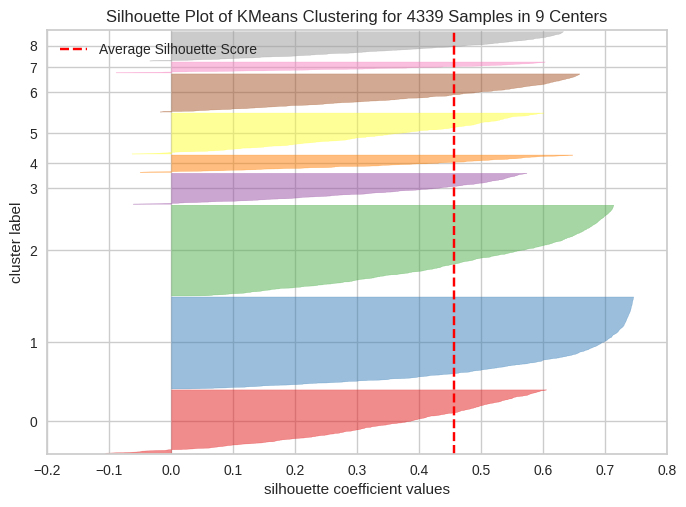

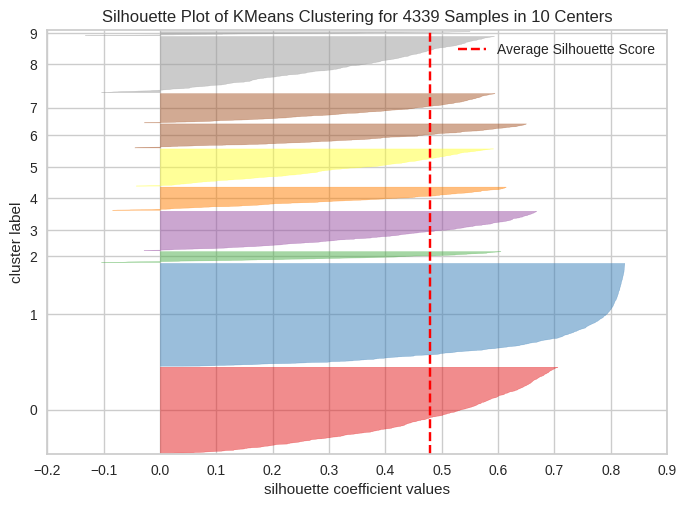

In [84]:
# Applying the silhouette visualization function for different clusters.
sil_visual(rfm_scaled, 10)

In [85]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=10)

In [86]:
# Fitting the model to the data
kmeans.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=10)

In [87]:
# Creating cluster labels for the data and appending it to the RFM dataframe
labels = kmeans.predict(rfm_scaled)
rfm_df_copy['Cluster'] = labels

In [88]:
# First 5 rows of the RFM dataframe after adding the cluster column
rfm_df_copy.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,325,1,77183.60,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,2
12349.0,18,73,1757.55,2
12350.0,310,17,334.40,1


In [89]:
# Cluster Profiling
# Grouping by clusters to understand the profiles
rfm_df_copy.groupby('Cluster').mean()

,Recency,Frequency,Monetary
Cluster,,,
0,23.096000,270.346000,6360.713820
1,217.664516,31.178495,691.605814
2,37.379115,40.582305,803.346689


In [90]:
# Number of customers belonging to each cluster
rfm_df_copy['Cluster'].value_counts()

2    1944
1    1395
0    1000
Name: Cluster, dtype: int64

* cluster 0 comprises of customers who are very recent, frequent and also contribute largely to the sales.
* Cluster 1 comprises of customers who are moderately recent, frequent and contribute an average amount to sales
* Cluster 2 comprises of customers who made purchaces a long time ago and purchase infrequently and contribute the least towards the sales of the company.

<Axes: xlabel='Recency', ylabel='Frequency'>

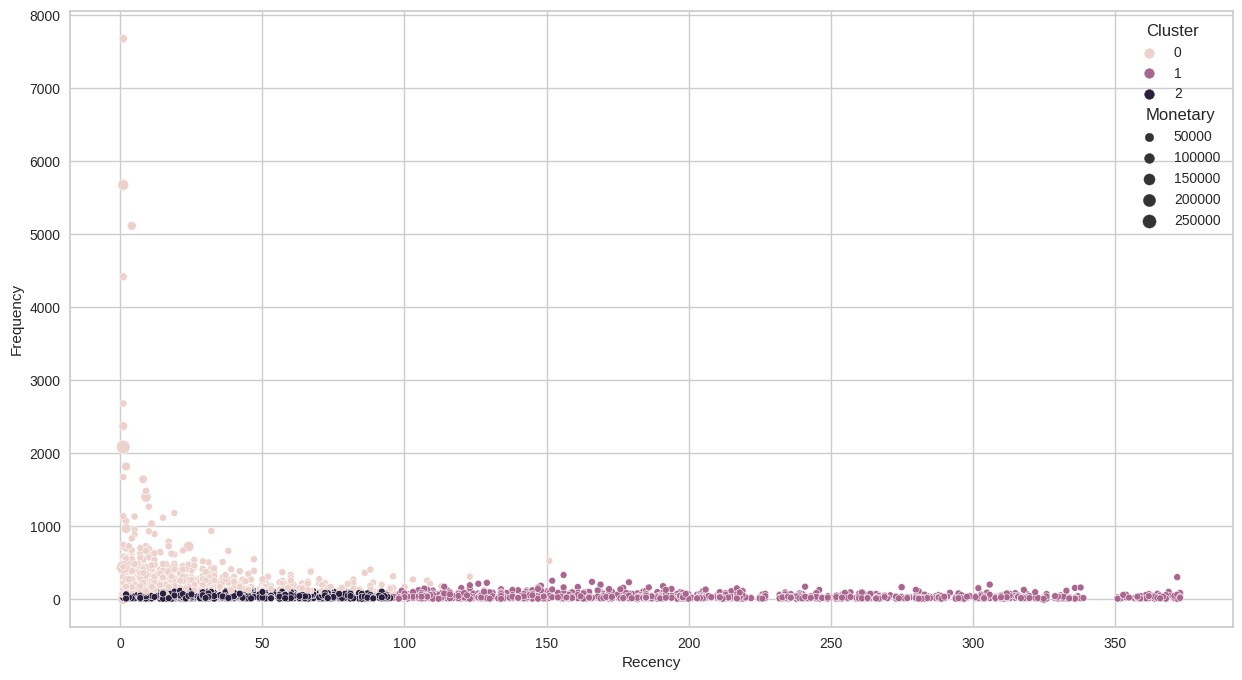

In [91]:
# Creating a scatter plot to understand the clusters visually
plt.figure(figsize = (15,8))
sns.scatterplot(x = rfm_df_copy['Recency'], y = rfm_df_copy['Frequency'], size= rfm_df_copy['Monetary'], hue = rfm_df_copy['Cluster'])

## Dendogram

In [92]:
# Library import for dendrogram
import scipy.cluster.hierarchy as shc

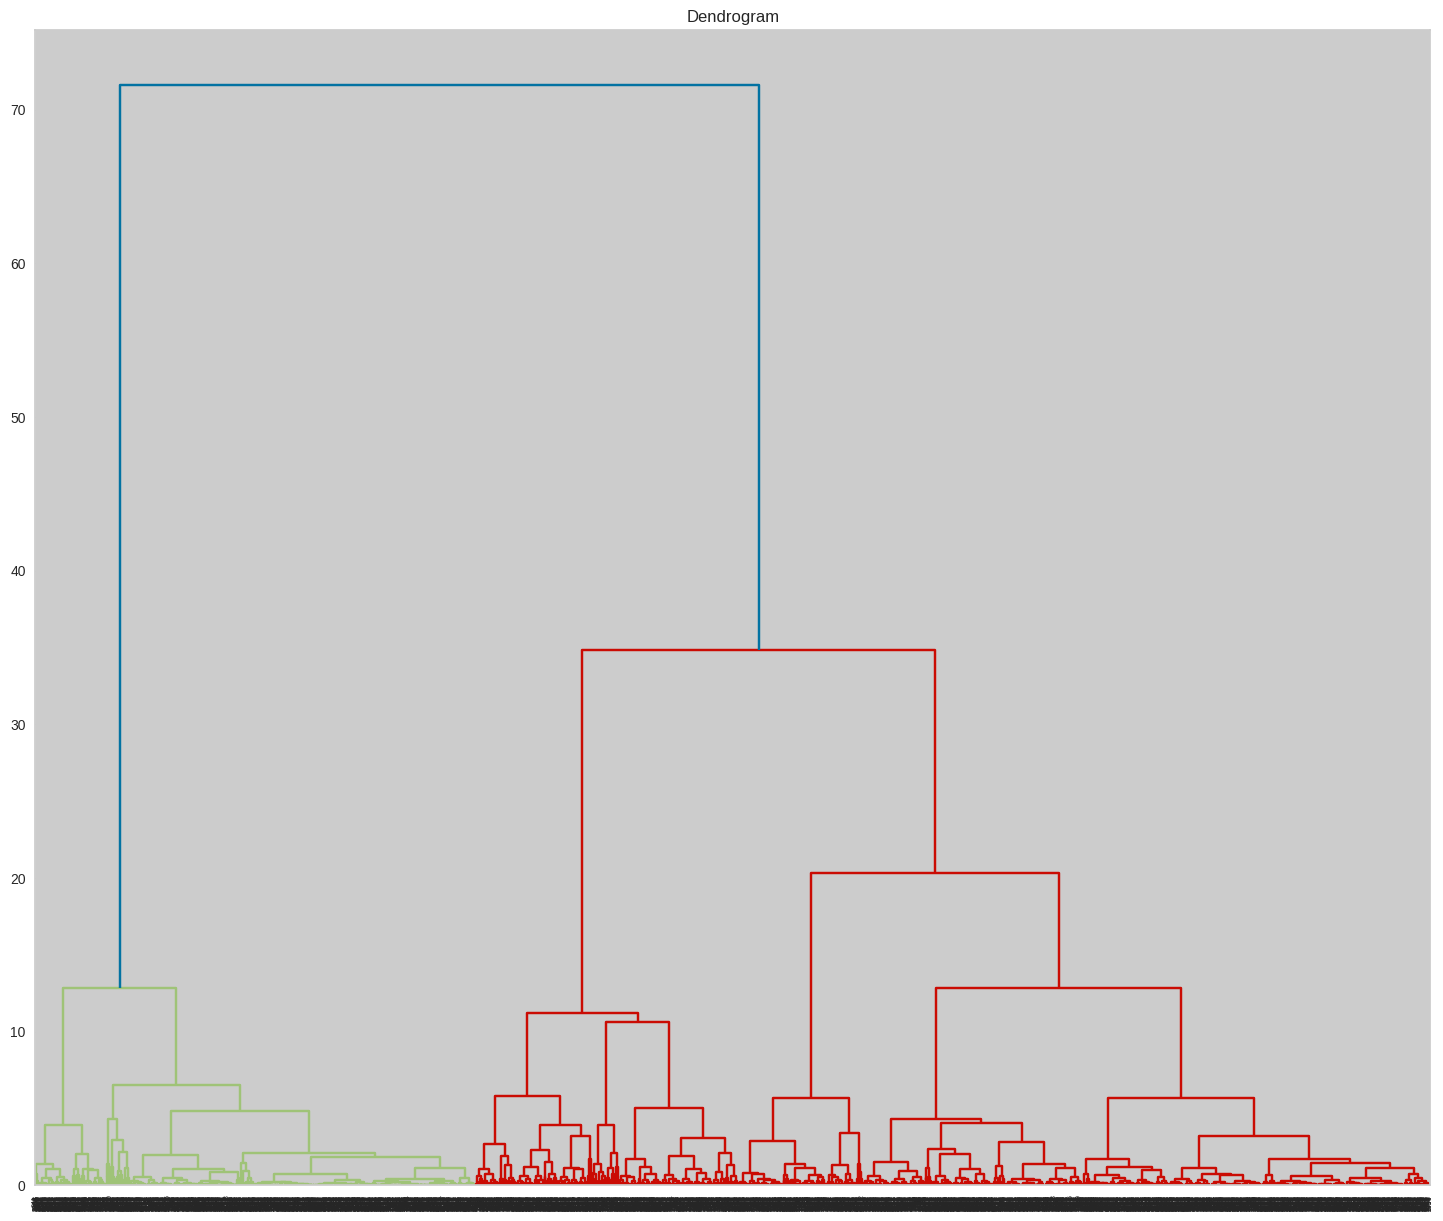

In [94]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize = (18,15))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(scaled_data, method='ward'))

In [95]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

In [96]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features = rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

applying the agglomerative 

In [97]:
# Fitting hierarchical clustering to the all dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

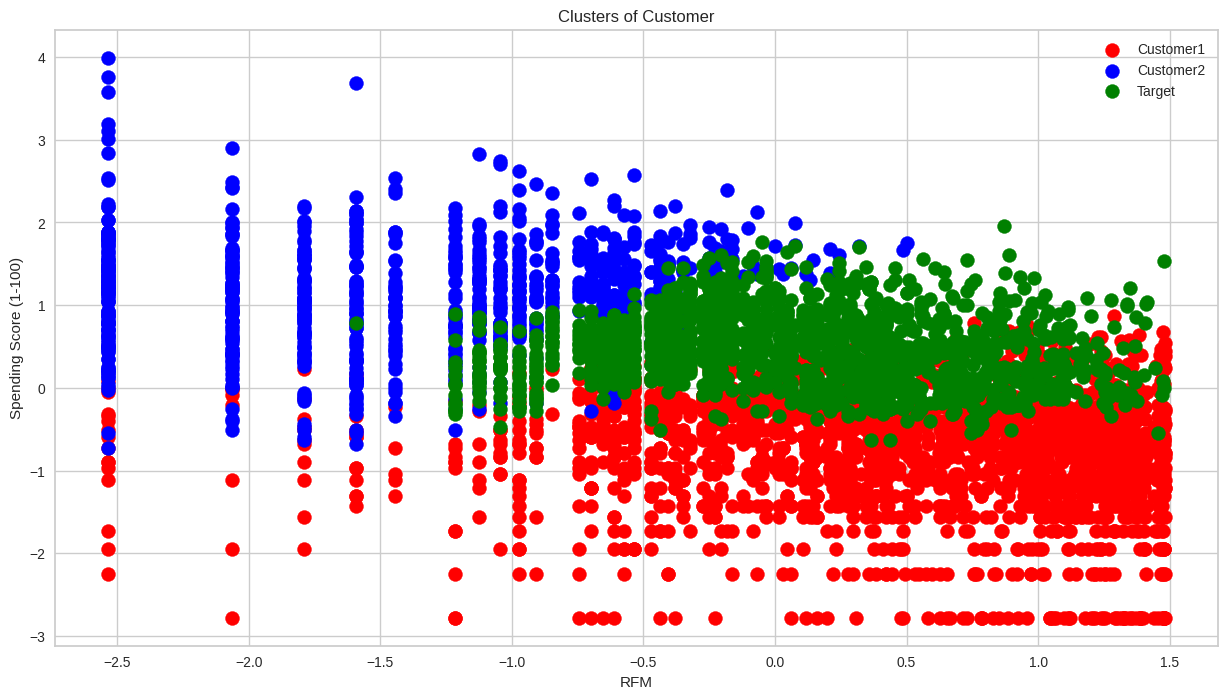

In [99]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Summary

In [102]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RFM", "3"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "RFM", "3"])
myTable.add_row(['3',"Hierarchical clustering  ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  | RFM  |             3             |
|   2    |  K-Means with Elbow methos     | RFM  |             3             |
|   3    |   Hierarchical clustering      | RFM  |             3             |
+--------+--------------------------------+------+---------------------------+


By applying different clustering algorithem to our dataset, we get the optimal number of cluster is equal to 3

## conclusion:

*  We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.
* we saw how we can segment our customer depending on our business requirements. We perform RFM for our entire customer base
* RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest.
* Using cluster profiling the average of recency, frequency and monetary values for each customer segment was identified.
* We used the K-means algorithm to segment our customer in various clusters having similar similarity. K-means did a pretty good job here, Also we remember that the more the number of cluster we take the better the result we get (seperation of multiple cluster).